# Practice Session 09: Forecasting


Author: <font color="blue">Manvir Kaur Singh</font>

E-mail: <font color="blue">manvir.kaur01@estudiant.upf.edu</font>

Date: <font color="blue">3/12/2023</font>

In [1]:
import io
import json
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

# 1. Dataset

In [2]:
# LEAVE AS-IS

INPUT_FILE = "aemet-barcelona-airport-2016-2022.json"
weather = pd.read_json(INPUT_FILE)

weather.head(5)

fecha indicativo     nombre  provincia  altitud  tmed prec  tmin  \
0  2016-07-01      0201D  BARCELONA  BARCELONA        6  24,1  0,0  21,9   
1  2016-07-02      0201D  BARCELONA  BARCELONA        6  24,6  0,0  22,3   
2  2016-07-03      0201D  BARCELONA  BARCELONA        6  23,4  0,0  21,9   
3  2016-07-04      0201D  BARCELONA  BARCELONA        6  23,8  0,0  21,8   
4  2016-07-05      0201D  BARCELONA  BARCELONA        6  25,3  0,0  23,2   

  horatmin  tmax horatmax   dir velmedia racha horaracha  sol presMax  \
0    03:40  26,3    11:50  99.0      3,1   5,8     10:50  NaN     NaN   
1    04:40  27,0    11:50  13.0      3,6   7,5     12:10  NaN     NaN   
2    11:00  24,9    08:10  20.0      4,2   8,9     08:50  NaN     NaN   
3    04:40  25,9    10:30  25.0      3,3   6,7     23:20  NaN     NaN   
4    00:10  27,4    14:00  35.0      3,1   6,4     02:00  NaN     NaN   

  horaPresMax presMin horaPresMin  
0         NaN     NaN         NaN  
1         NaN     NaN         NaN  
2         NaN     NaN         NaN  
3         NaN     NaN         NaN  
4         NaN     NaN         NaN

In [3]:
# LEAVE AS-IS

COLUMN_NAMES = {
  "fecha" : "date",
  "indicativo" : "station_num",
  "nombre" : "station_name",
  "provincia" : "station_province",
  "altitud" : "station_altitude",
  "tmed" : "temp_avg",
  "tmin" : "temp_min",
  "tmax" : "temp_max",
  "horatmin" : "time_temp_min",
  "horatmax" : "time_temp_max",
  "prec" : "rainfall",
  "dir" : "windspeed_dir",
  "velmedia" : "windspeed_avg",
  "racha" : "windspeed_gusts",
  "horaracha" : "time_windspeed_gusts",
  "sol" : "sun",
  "presMax" : "pressure_max",
  "horaPresMax" : "time_pressure_max",
  "presMin" : "pressure_min",
  "horaPresMin" : "time_pressure_min"
}

<font size="+1" color="red">Rename column names, and print the first 5 rows of the data</font>

In [4]:
weather = weather.rename(columns=COLUMN_NAMES)
weather.head()


date station_num station_name station_province  station_altitude  \
0  2016-07-01       0201D    BARCELONA        BARCELONA                 6   
1  2016-07-02       0201D    BARCELONA        BARCELONA                 6   
2  2016-07-03       0201D    BARCELONA        BARCELONA                 6   
3  2016-07-04       0201D    BARCELONA        BARCELONA                 6   
4  2016-07-05       0201D    BARCELONA        BARCELONA                 6   

  temp_avg rainfall temp_min time_temp_min temp_max time_temp_max  \
0     24,1      0,0     21,9         03:40     26,3         11:50   
1     24,6      0,0     22,3         04:40     27,0         11:50   
2     23,4      0,0     21,9         11:00     24,9         08:10   
3     23,8      0,0     21,8         04:40     25,9         10:30   
4     25,3      0,0     23,2         00:10     27,4         14:00   

   windspeed_dir windspeed_avg windspeed_gusts time_windspeed_gusts  sun  \
0           99.0           3,1             5,8                10:50  NaN   
1           13.0           3,6             7,5                12:10  NaN   
2           20.0           4,2             8,9                08:50  NaN   
3           25.0           3,3             6,7                23:20  NaN   
4           35.0           3,1             6,4                02:00  NaN   

  pressure_max time_pressure_max pressure_min time_pressure_min  
0          NaN               NaN          NaN               NaN  
1          NaN               NaN          NaN               NaN  
2          NaN               NaN          NaN               NaN  
3          NaN               NaN          NaN               NaN  
4          NaN               NaN          NaN               NaN

<font size="+1" color="red">Drop the station_num, station_name, station_province, station_altitude, and time_* columns, and print the first 5 rows of the data</font>

In [5]:
weather = weather.drop(columns ={'station_num', 'station_name', 'station_province', 'station_altitude', 'time_temp_min', 'time_temp_max', 'time_windspeed_gusts', 'time_pressure_max', 'time_pressure_min'}, axis = 1)
weather.head()  

date temp_avg rainfall temp_min temp_max  windspeed_dir  \
0  2016-07-01     24,1      0,0     21,9     26,3           99.0   
1  2016-07-02     24,6      0,0     22,3     27,0           13.0   
2  2016-07-03     23,4      0,0     21,9     24,9           20.0   
3  2016-07-04     23,8      0,0     21,8     25,9           25.0   
4  2016-07-05     25,3      0,0     23,2     27,4           35.0   

  windspeed_avg windspeed_gusts  sun pressure_max pressure_min  
0           3,1             5,8  NaN          NaN          NaN  
1           3,6             7,5  NaN          NaN          NaN  
2           4,2             8,9  NaN          NaN          NaN  
3           3,3             6,7  NaN          NaN          NaN  
4           3,1             6,4  NaN          NaN          NaN

<font size="+1" color="red">Implement *str_commas_to_float*.</font>

In [6]:
def str_commas_to_float(x):
    if x == 'Ip':
        return 0.0
    try:
        if isinstance(x, float):
            return x
        return float(x.replace(',', '.'))
    except ValueError:
        return np.nan


<font size="+1" color="red">Test *str_commas_to_float*.</font>

In [7]:
assert np.isnan(str_commas_to_float(''))
assert np.isnan(str_commas_to_float('Varias'))
assert np.isnan(str_commas_to_float('06:30')) 

assert str_commas_to_float('0,0') == 0.0 
assert str_commas_to_float('Ip') == 0.0

assert str_commas_to_float('13,5') == 13.5 

assert str_commas_to_float('13') == 13.0 

<font size="+1" color="red">Apply the above function to the specified columns.</font>

In [8]:
columns = ['temp_min', 'temp_max', 'temp_avg', 'rainfall', 'windspeed_dir', 'windspeed_avg', 'windspeed_gusts', 'sun', 'pressure_min', 'pressure_max']

for col in columns:
    weather[col] = weather[col].apply(str_commas_to_float)

weather.head()
    

date  temp_avg  rainfall  temp_min  temp_max  windspeed_dir  \
0  2016-07-01      24.1       0.0      21.9      26.3           99.0   
1  2016-07-02      24.6       0.0      22.3      27.0           13.0   
2  2016-07-03      23.4       0.0      21.9      24.9           20.0   
3  2016-07-04      23.8       0.0      21.8      25.9           25.0   
4  2016-07-05      25.3       0.0      23.2      27.4           35.0   

   windspeed_avg  windspeed_gusts  sun  pressure_max  pressure_min  
0            3.1              5.8  NaN           NaN           NaN  
1            3.6              7.5  NaN           NaN           NaN  
2            4.2              8.9  NaN           NaN           NaN  
3            3.3              6.7  NaN           NaN           NaN  
4            3.1              6.4  NaN           NaN           NaN

In [9]:
# LEAVE AS-IS

weather.set_index('date', inplace=True)
weather.index = pd.to_datetime(weather.index)
weather.head(3)

temp_avg  rainfall  temp_min  temp_max  windspeed_dir  \
date                                                                
2016-07-01      24.1       0.0      21.9      26.3           99.0   
2016-07-02      24.6       0.0      22.3      27.0           13.0   
2016-07-03      23.4       0.0      21.9      24.9           20.0   

            windspeed_avg  windspeed_gusts  sun  pressure_max  pressure_min  
date                                                                         
2016-07-01            3.1              5.8  NaN           NaN           NaN  
2016-07-02            3.6              7.5  NaN           NaN           NaN  
2016-07-03            4.2              8.9  NaN           NaN           NaN

In [10]:
# LEAVE AS-IS

# Configure font sizes
plt.rc('font', size=10) 
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=16)

In [11]:
# LEAVE AS-IS

# Plot function
def plot(df, column, xlabel='Date', ylabel=''):
    
    # Create a figure
    plt.figure(figsize=(16,5))

    # Plot for dates
    plt.plot_date(df.index, df[column],
                  fmt='.-', color='black')

    # Label axis
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()


def plot_min_avg_max(df, min_column='temp_min', avg_column='temp_avg', max_column='temp_max', xlabel='Date', ylabel='Daily temperature [C]'):

    # Create a figure
    plt.figure(figsize=(16,5))

    # Plot for dates
    plt.plot_date(df.index, df[avg_column],
                  fmt='.-', color='black', label='Average')
    plt.fill_between(df.index, df[min_column], df[max_column],
                     color='lightgray')
    plt.legend()

    # Label axis
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

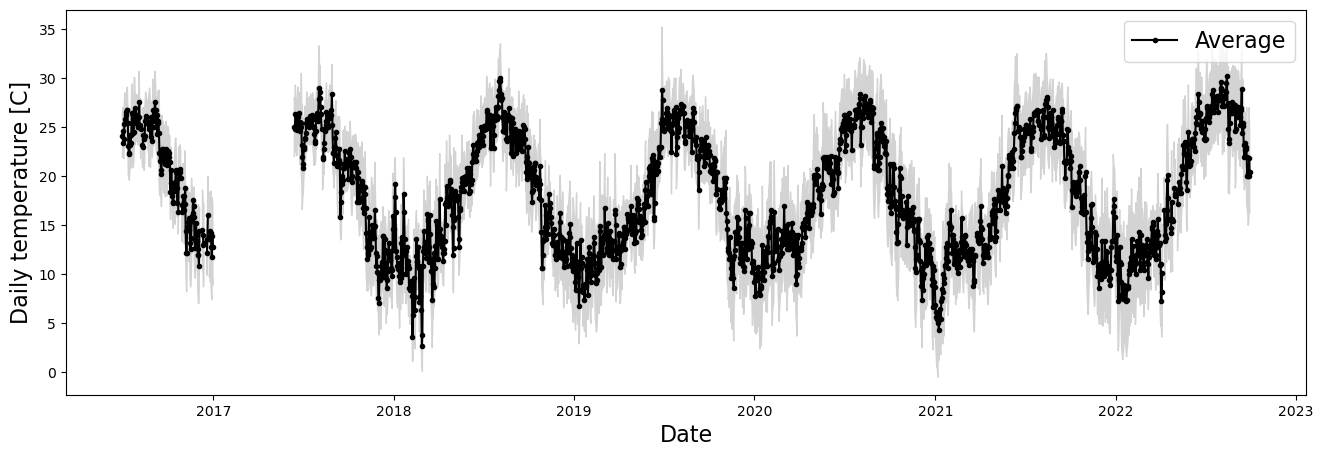

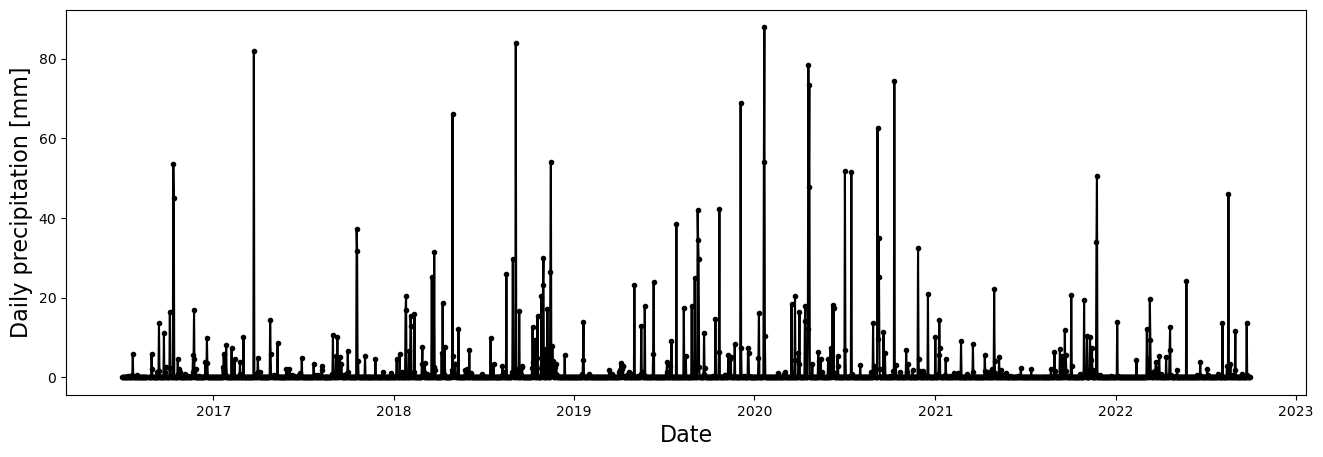

In [12]:
# LEAVE AS-IS

# Retrieve the last 7 years
weather_sample = weather.tail(7*365)

# Plot temperature
plot_min_avg_max(weather_sample)

# Plot precipitation
plot(weather_sample, "rainfall", ylabel="Daily precipitation [mm]")

<font size="+1" color="red">Brief commentary on these two plots. Answer the following: is seasonality clear in both of them, on one of them?</font>

In the initial graph, the peaks distinctly indicate the hottest months of each year, while the troughs represent the coldest months marking the transition between one year and the next. Conversely, when examining precipitation, there isn't a discernible pattern that consistently explains the seasonality for each year. Some years exhibit higher precipitation during colder months than warmer ones, but this behavior doesn't consistently repeat across all months.

# 1. Smooth this series


## 1.1 Smooth the series using moving averages

<font size="+1" color="red">Implement of "moving_average"</font>

In [13]:
def moving_average(df, window_size):

    smoothed = pd.DataFrame(columns=df.columns)

    for i in range(len(df)):
         # Compute the start and end indices for the moving average window
        start_idx = max(0, i - window_size + 1)
        end_idx = i + 1

        # Create a sub-dataframe with the corresponding rows
        sub_df = df.iloc[start_idx:end_idx]

        # Compute the mean for each column and append to the smoothed dataframe
        smoothed.loc[i] = sub_df.mean()
        
    smoothed.set_index(df.index, inplace=True)
    
    return smoothed

In [14]:
# LEAVE AS-IS

window_size = 7

weather_smoothed = moving_average(weather, window_size)

weather_smoothed.head(10)

temp_avg  rainfall   temp_min   temp_max  windspeed_dir  \
date                                                                   
2016-07-01  24.100000  0.000000  21.900000  26.300000      99.000000   
2016-07-02  24.350000  0.000000  22.100000  26.650000      56.000000   
2016-07-03  24.033333  0.000000  22.033333  26.066667      44.000000   
2016-07-04  23.975000  0.000000  21.975000  26.025000      39.250000   
2016-07-05  24.240000  0.000000  22.220000  26.300000      38.400000   
2016-07-06  24.500000  0.000000  22.366667  26.666667      35.333333   
2016-07-07  24.628571  0.000000  22.557143  26.728571      44.428571   
2016-07-08  24.928571  0.014286  22.857143  27.028571      33.571429   
2016-07-09  25.214286  0.014286  23.214286  27.242857      34.285714   
2016-07-10  25.700000  0.014286  23.642857  27.771429      34.142857   

            windspeed_avg  windspeed_gusts  sun  pressure_max  pressure_min  
date                                                                         
2016-07-01       3.100000         5.800000  NaN           NaN           NaN  
2016-07-02       3.350000         6.650000  NaN           NaN           NaN  
2016-07-03       3.633333         7.400000  NaN           NaN           NaN  
2016-07-04       3.550000         7.225000  NaN           NaN           NaN  
2016-07-05       3.460000         7.060000  NaN           NaN           NaN  
2016-07-06       3.716667         7.833333  NaN           NaN           NaN  
2016-07-07       3.742857         8.185714  NaN           NaN           NaN  
2016-07-08       3.657143         8.871429  NaN           NaN           NaN  
2016-07-09       3.585714         8.757143  NaN           NaN           NaN  
2016-07-10       3.657143         8.800000  NaN           NaN           NaN

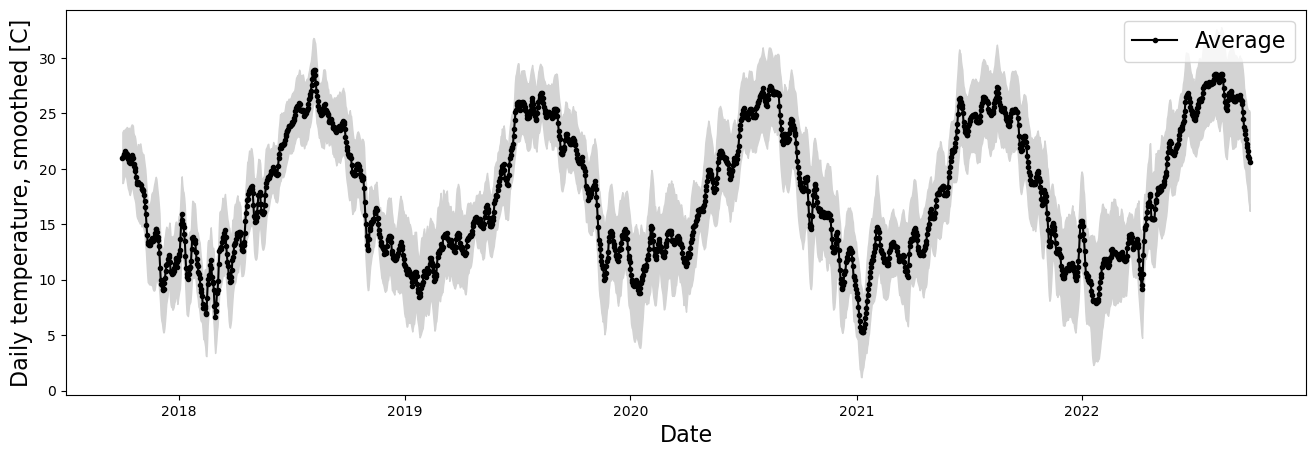

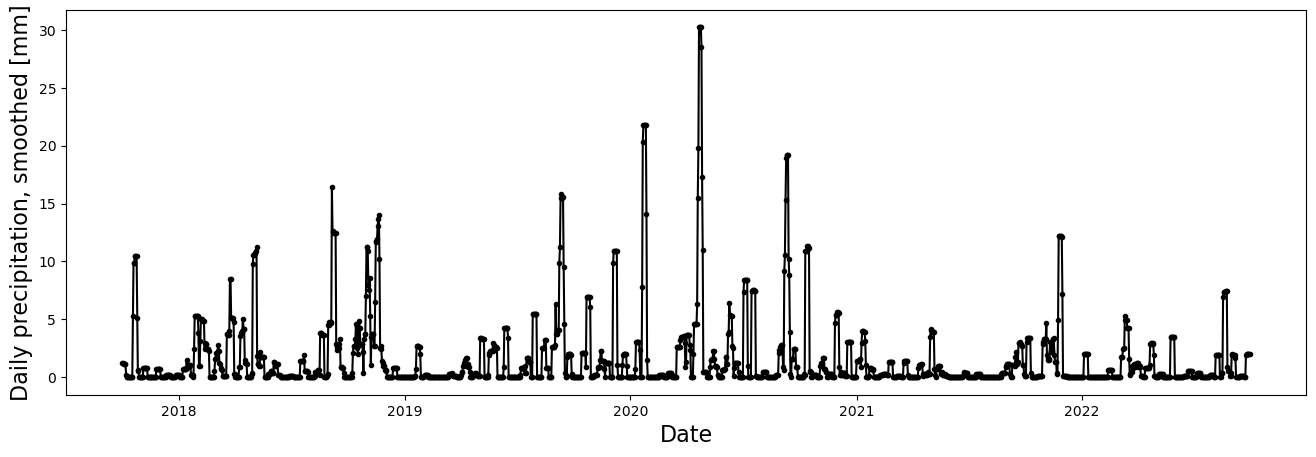

In [15]:
# LEAVE AS-IS

# Sample last 5 years
weather_smoothed_sample = weather_smoothed.tail(5*365)

# Plot smoothed temperature
plot_min_avg_max(weather_smoothed_sample, ylabel='Daily temperature, smoothed [C]')

# Plot smoothed precipitation
plot(weather_smoothed_sample, "rainfall", ylabel="Daily precipitation, smoothed [mm]")

<font size="+1" color="red">Brief commentary indicating what are the key difficulties when implementing a function for "moving_average"</font>

The key difficulty was on how to compute the mean, which had to be with axis = 0

<font size="+1" color="red">Create a separate ``test`` dataset, and smooths this ``test`` dataset 25 times. Plot the smoothed daily temperature and smoothed daily precipitation in the ``test`` dataset.</font>

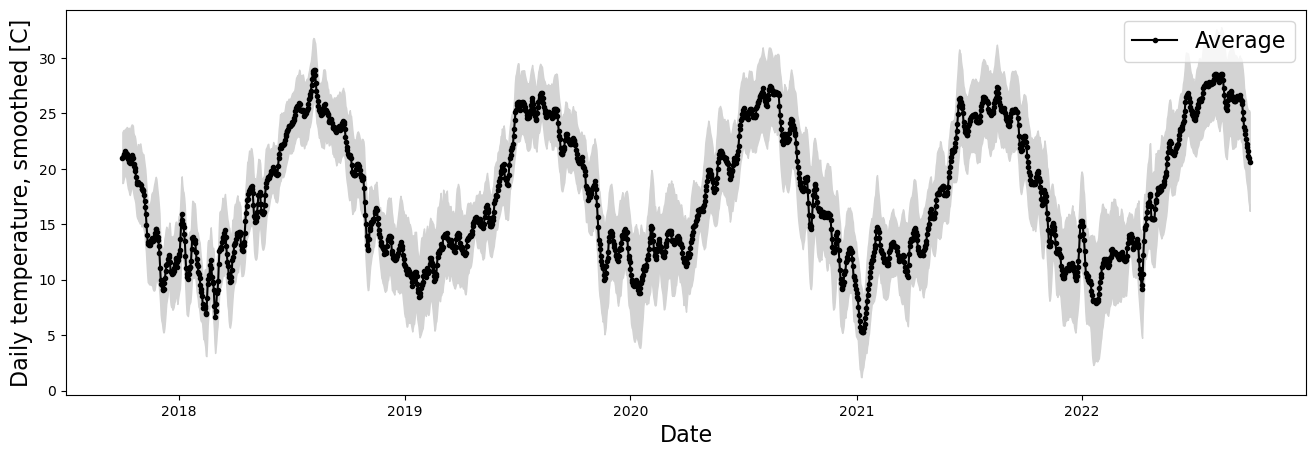

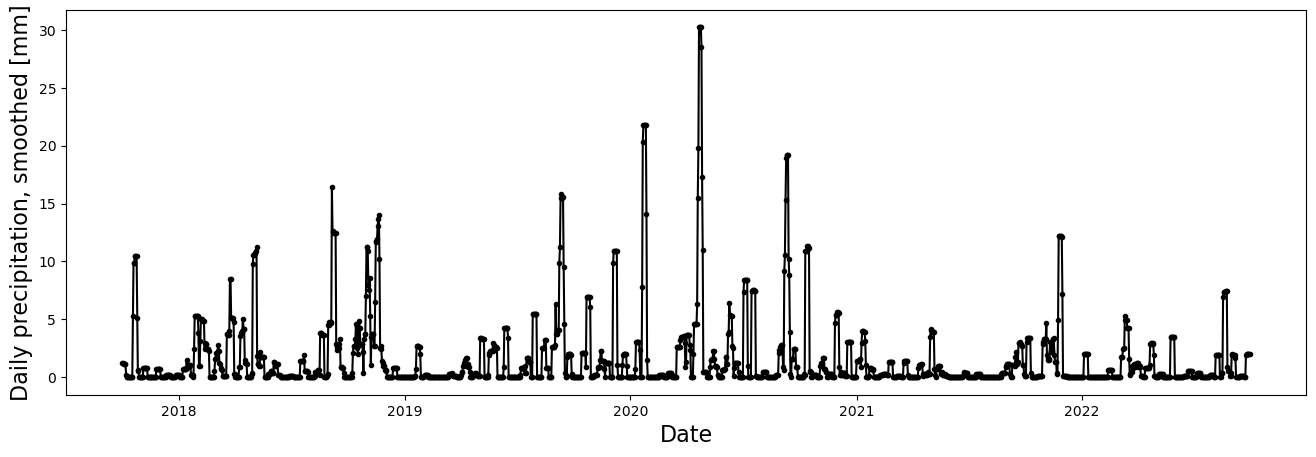

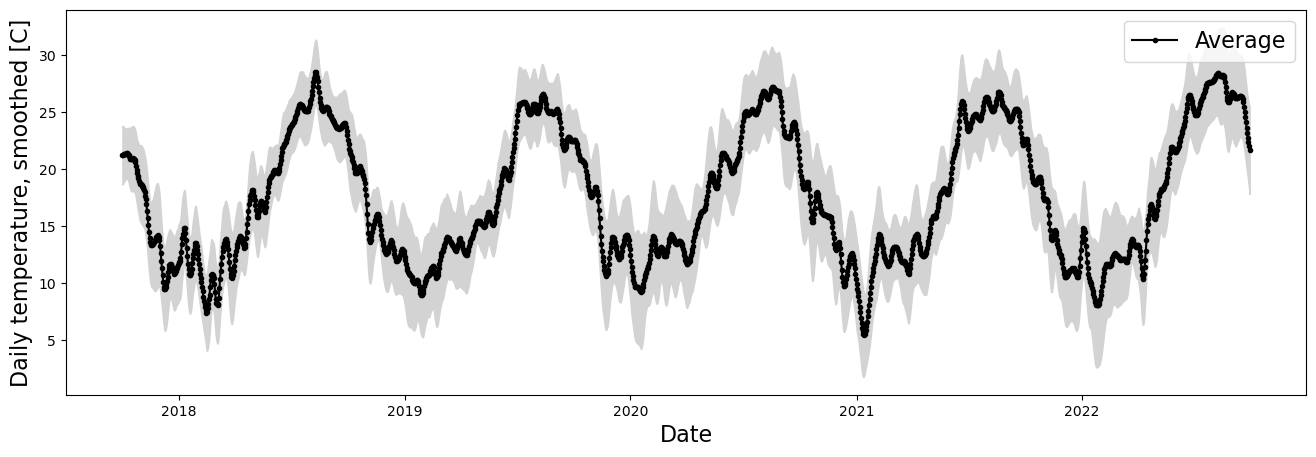

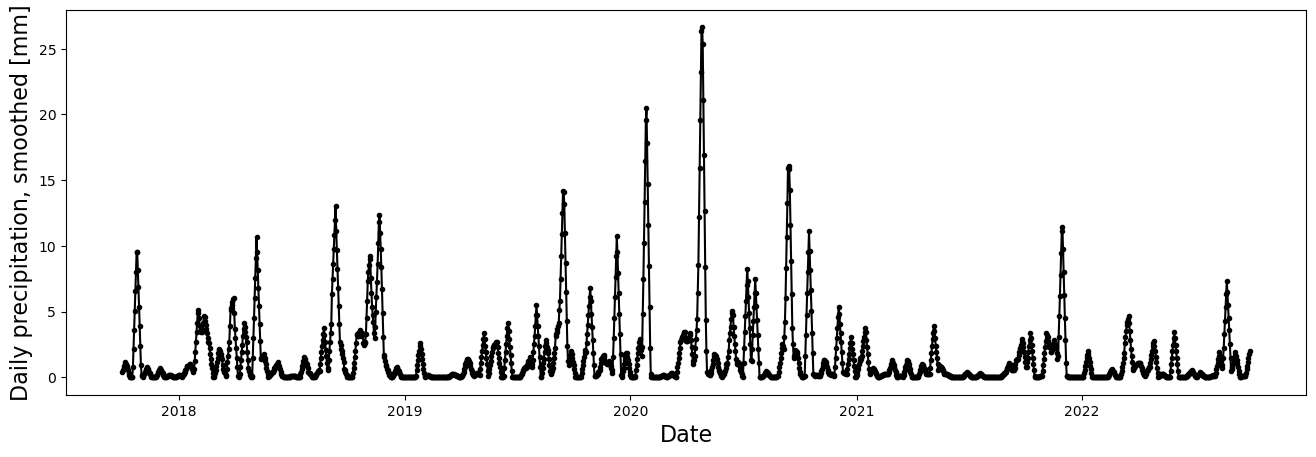

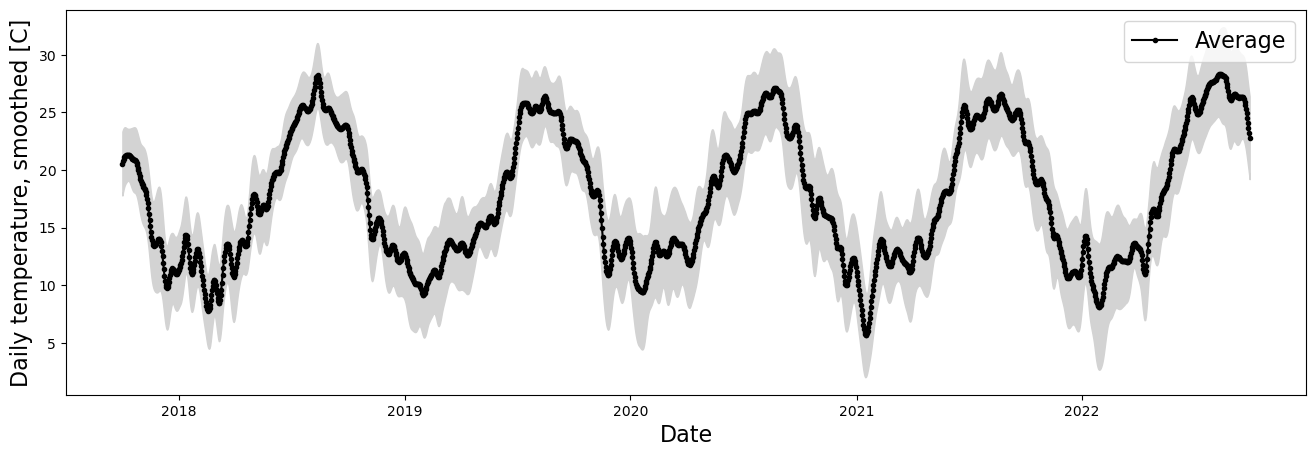

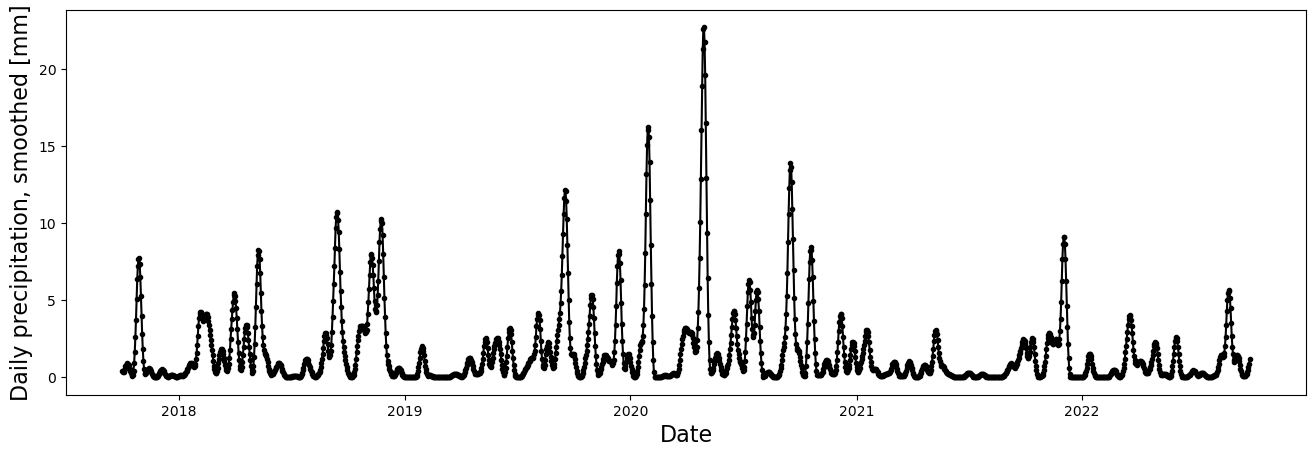

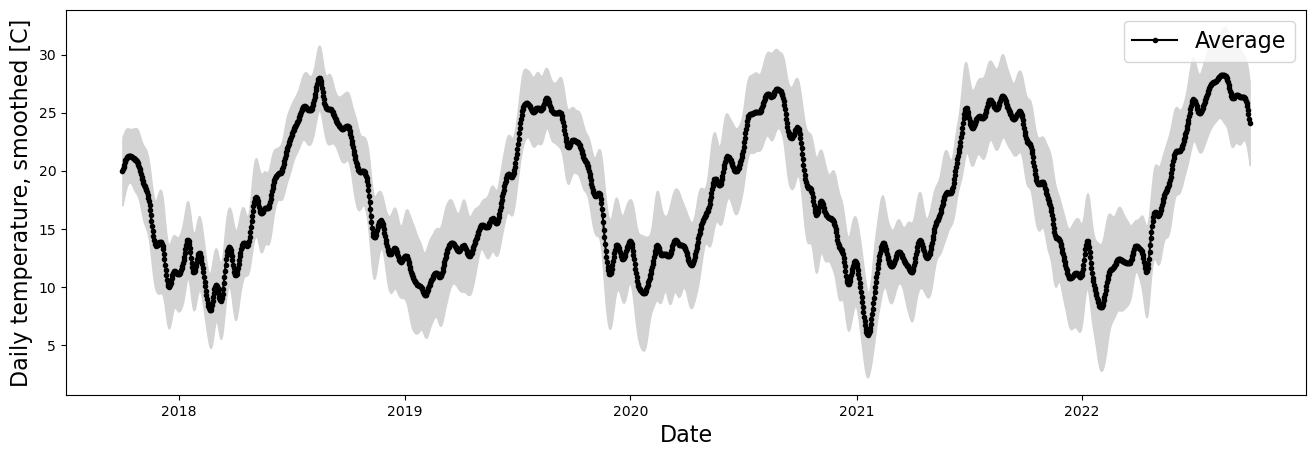

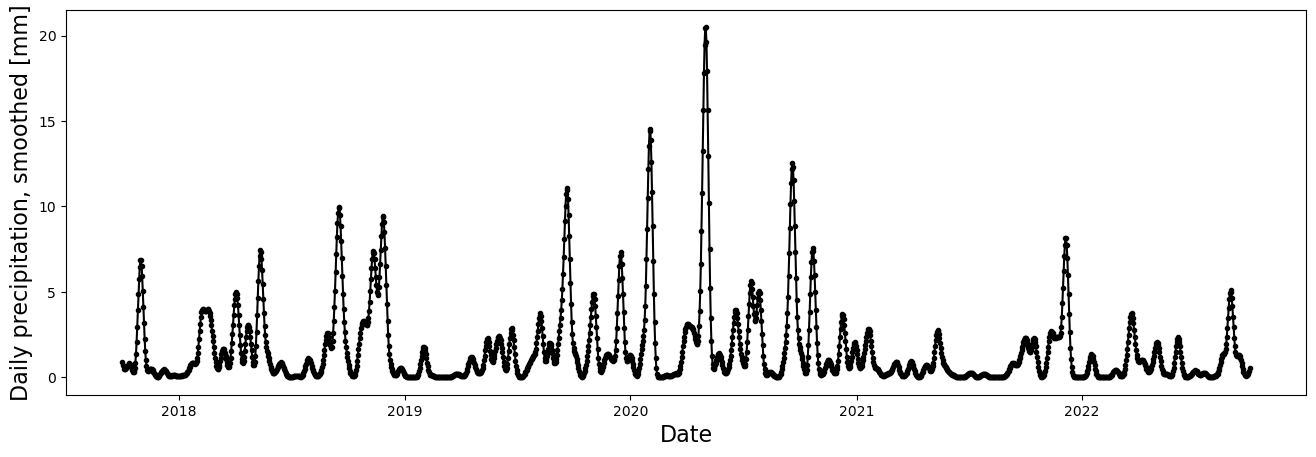

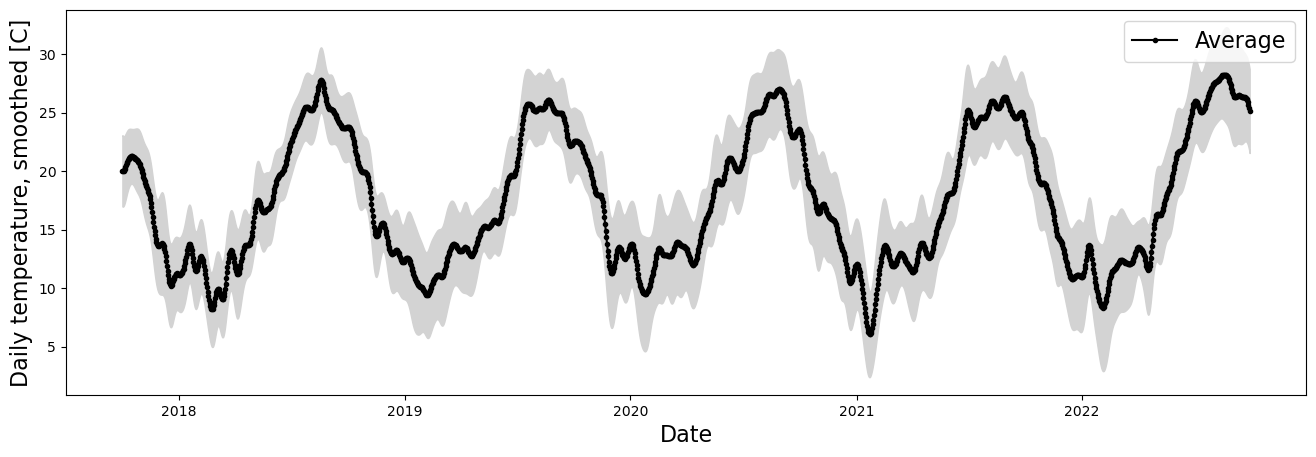

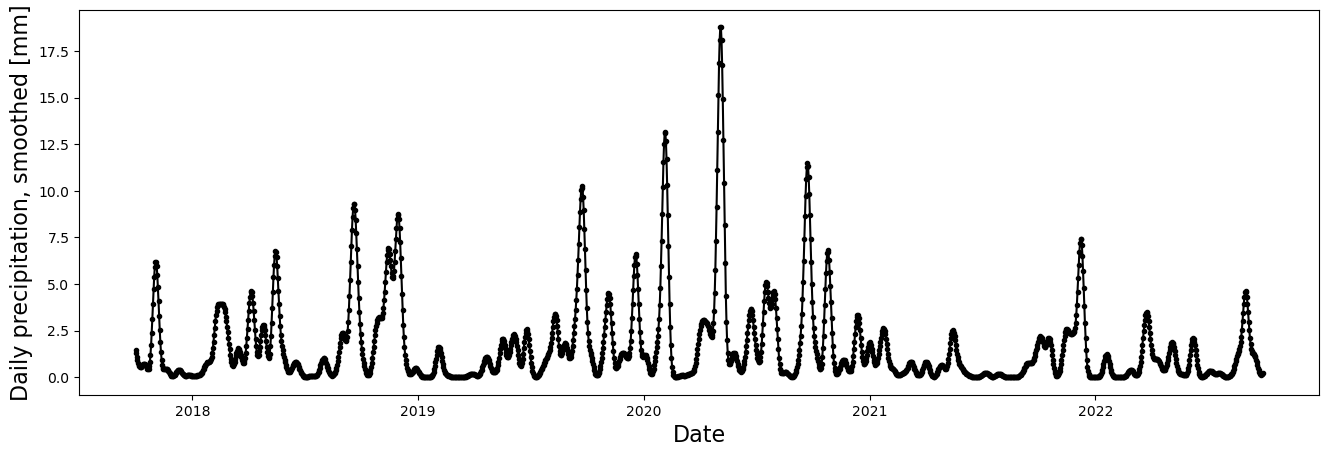

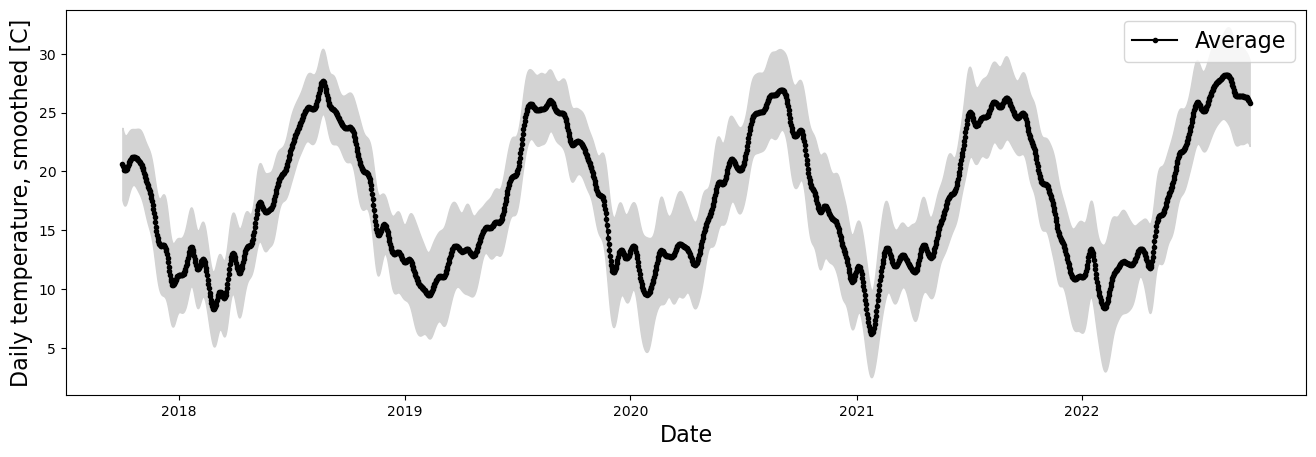

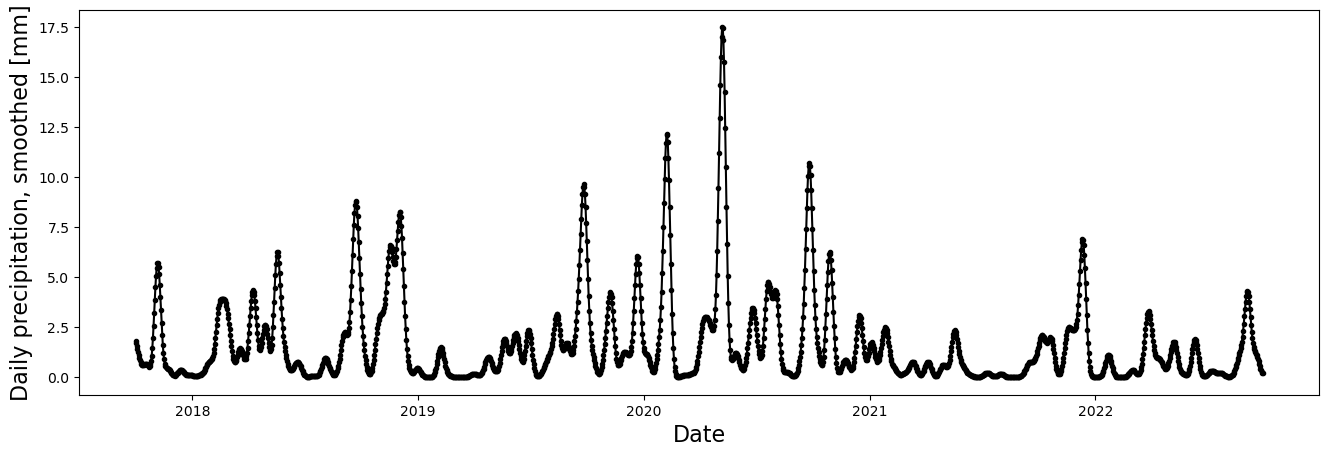

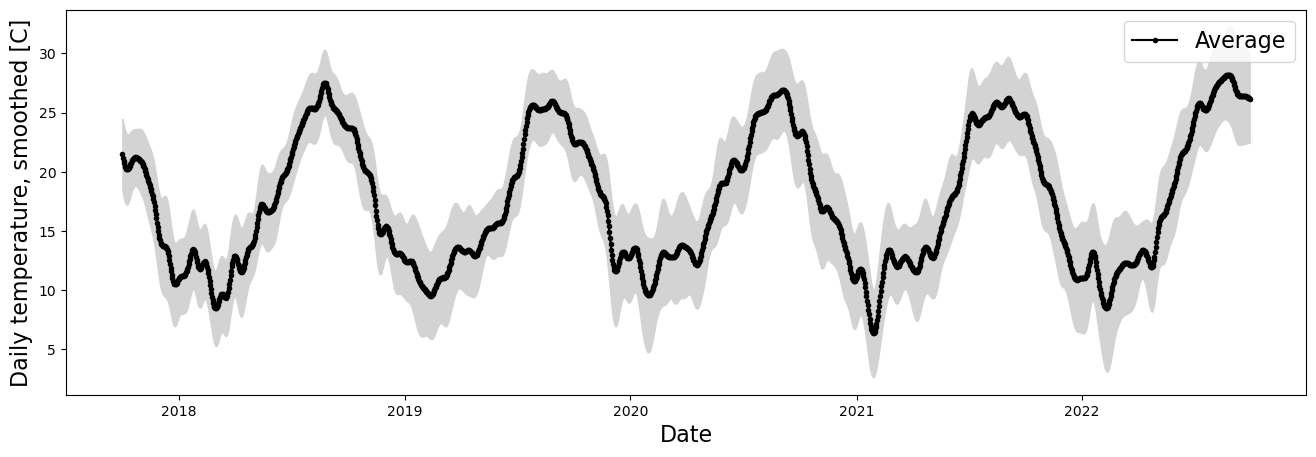

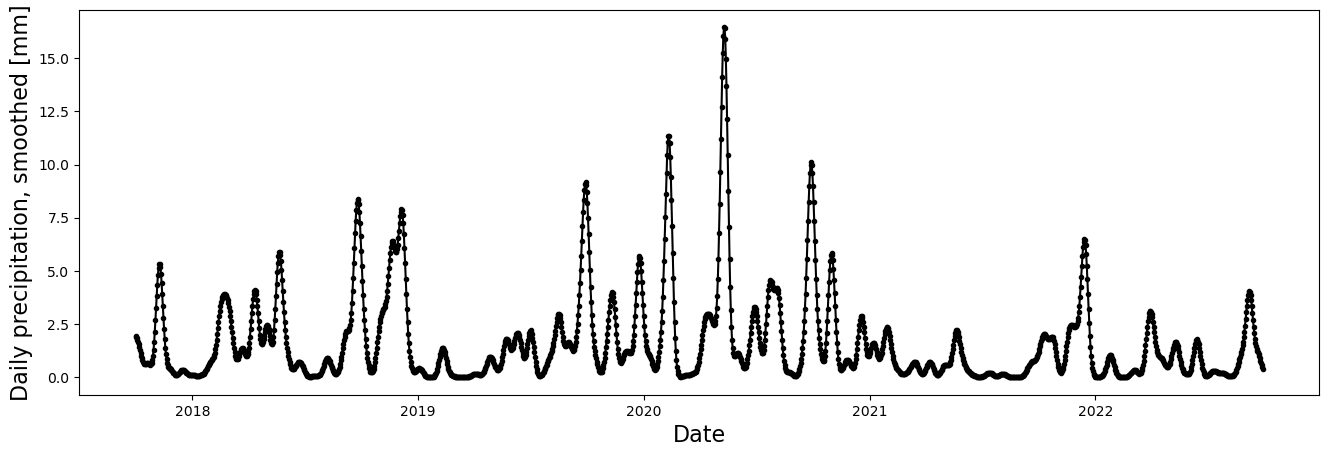

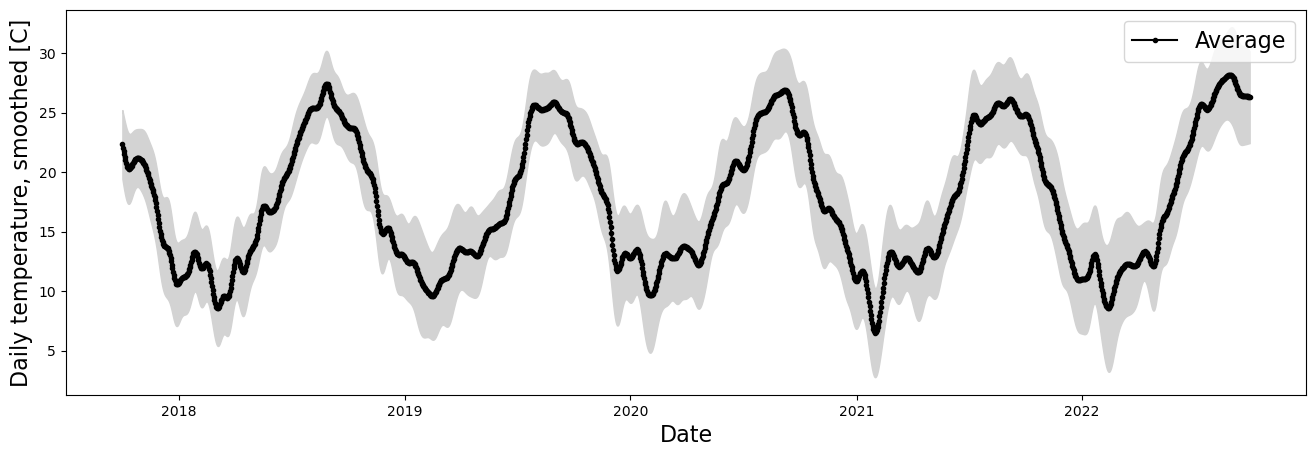

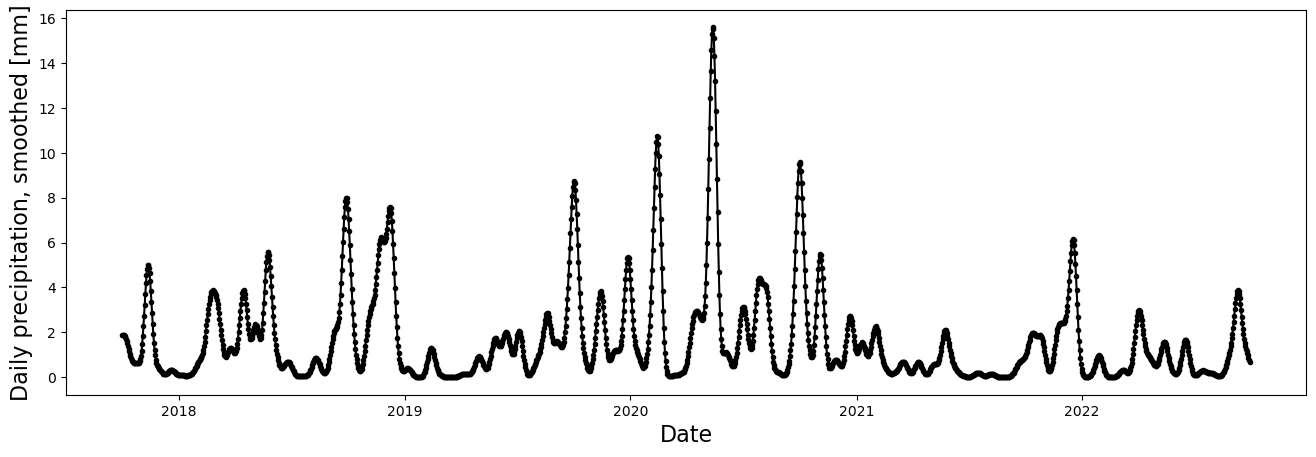

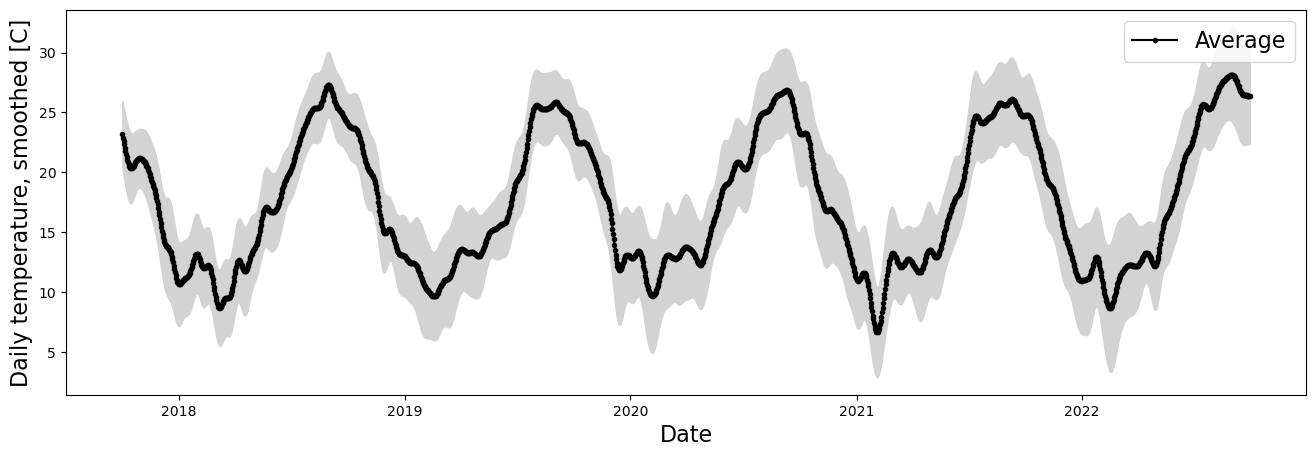

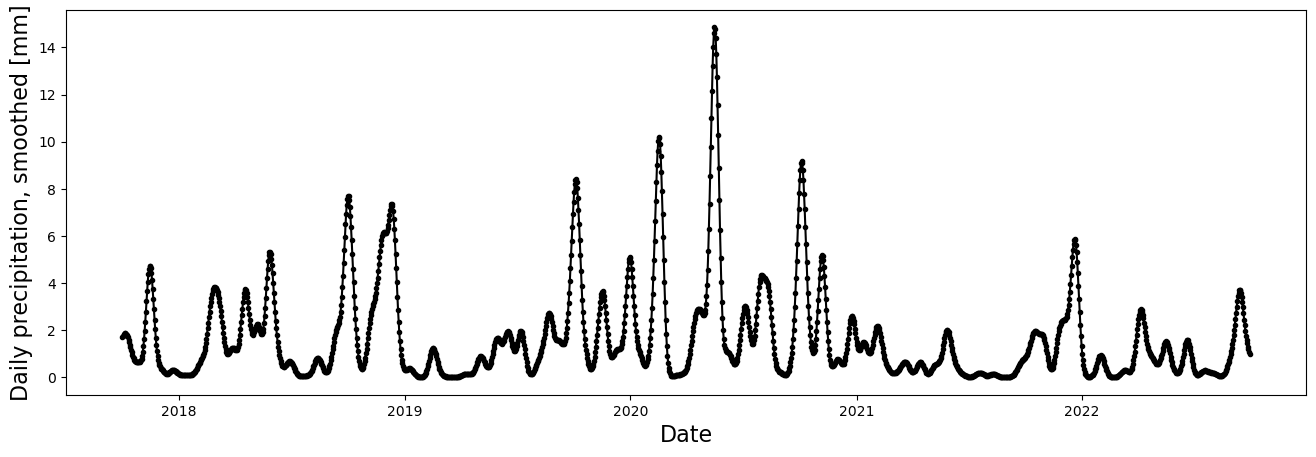

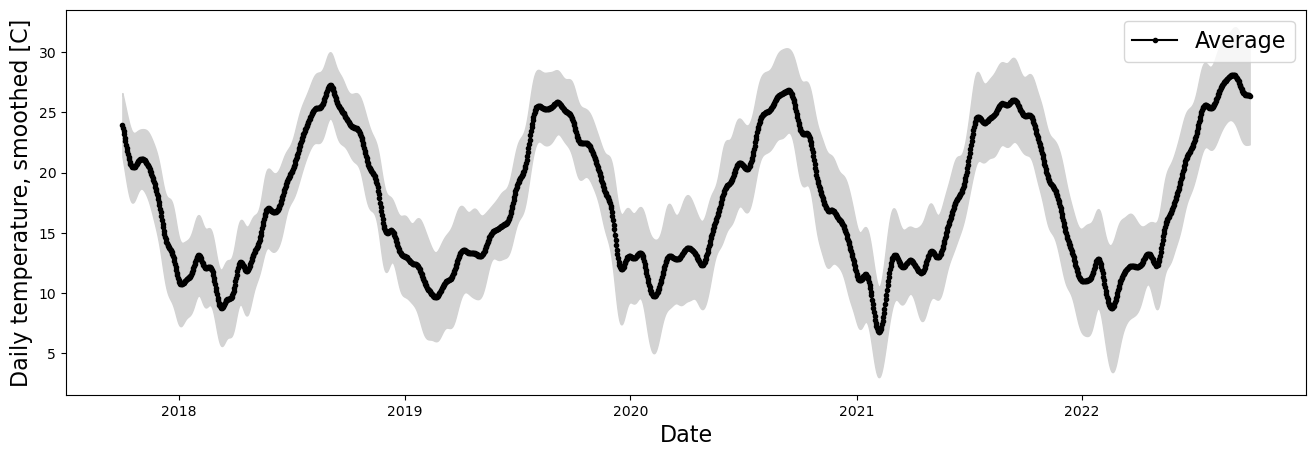

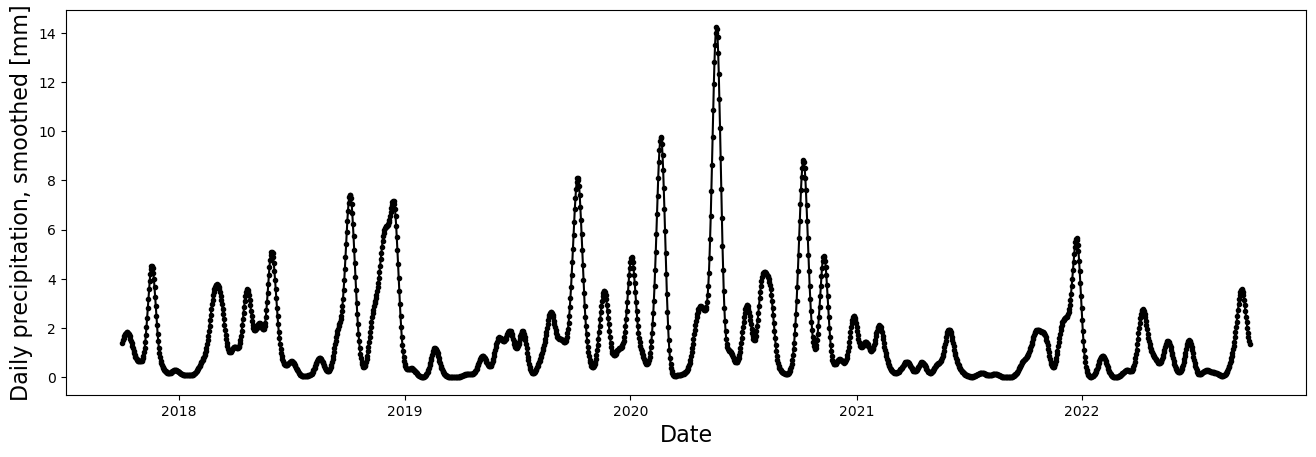

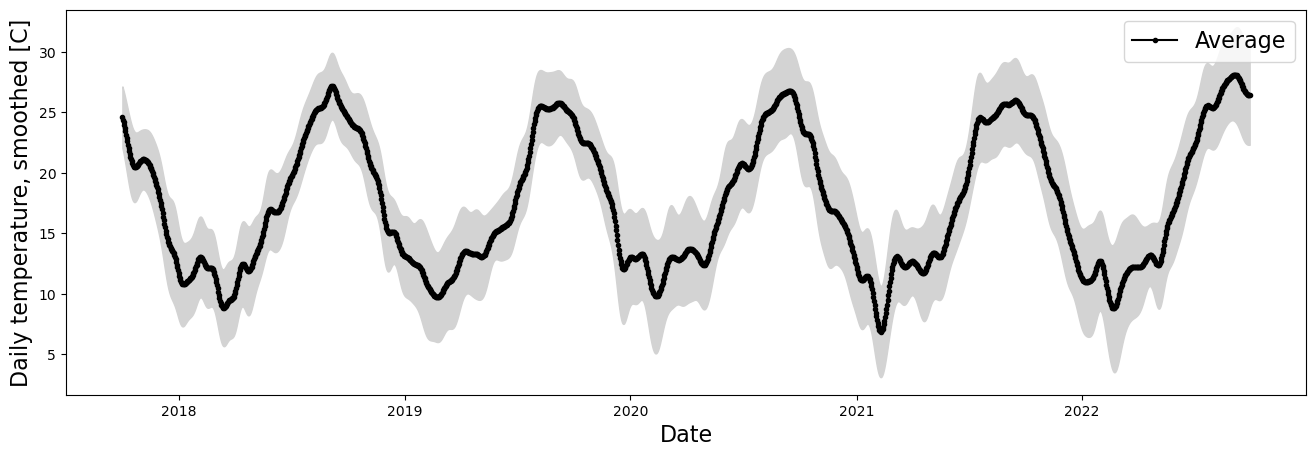

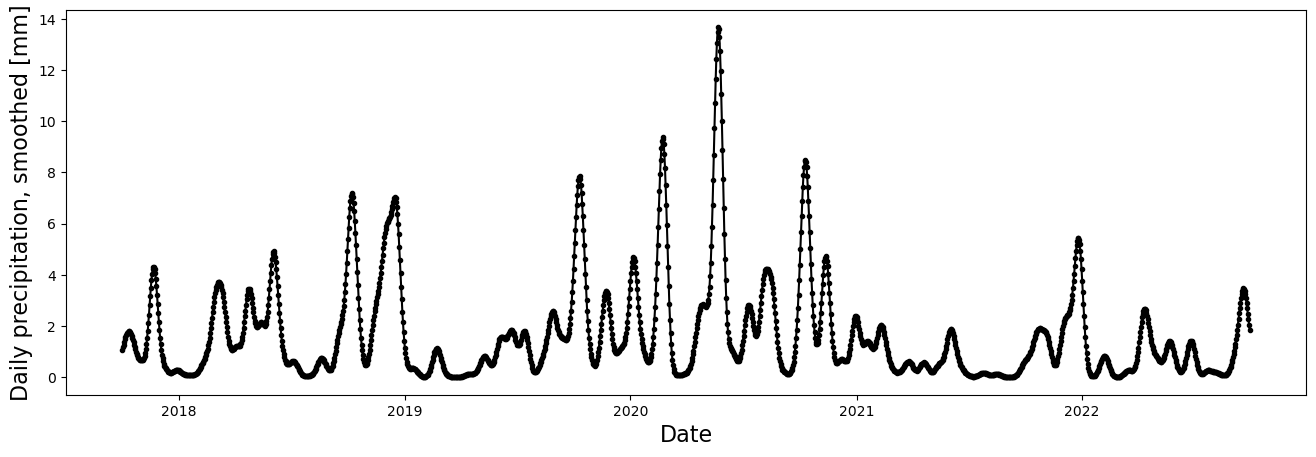

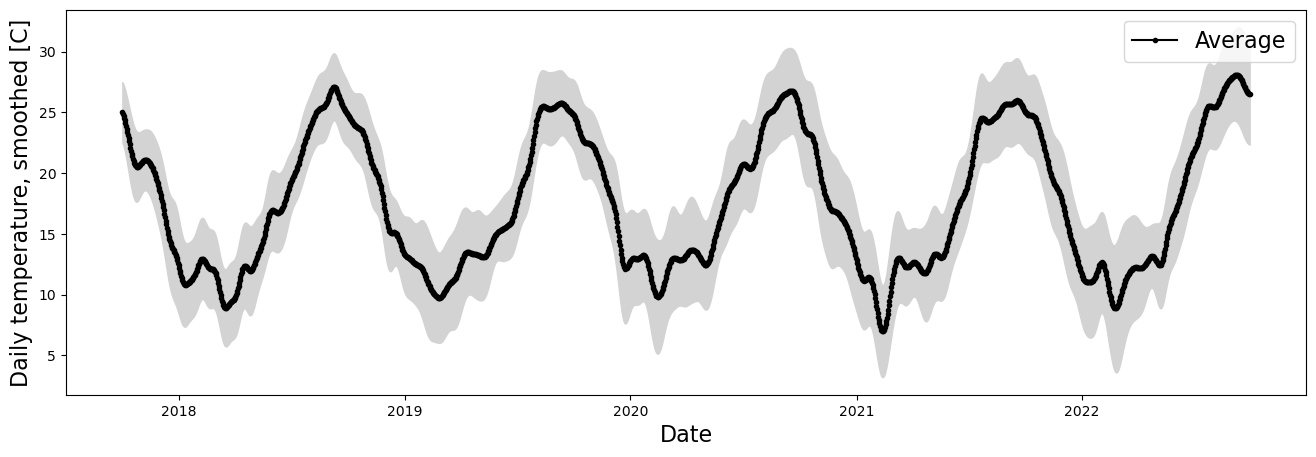

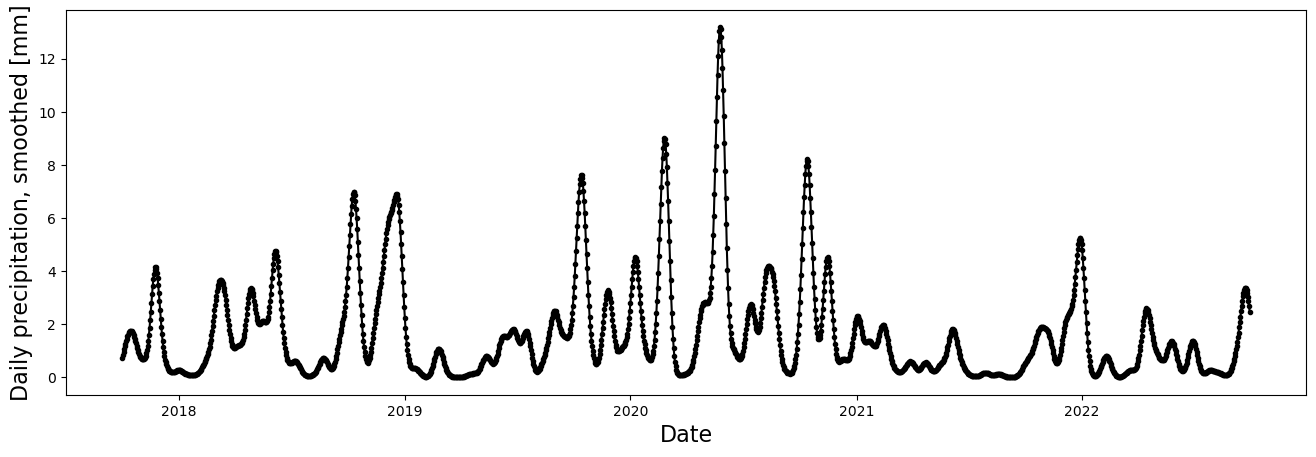

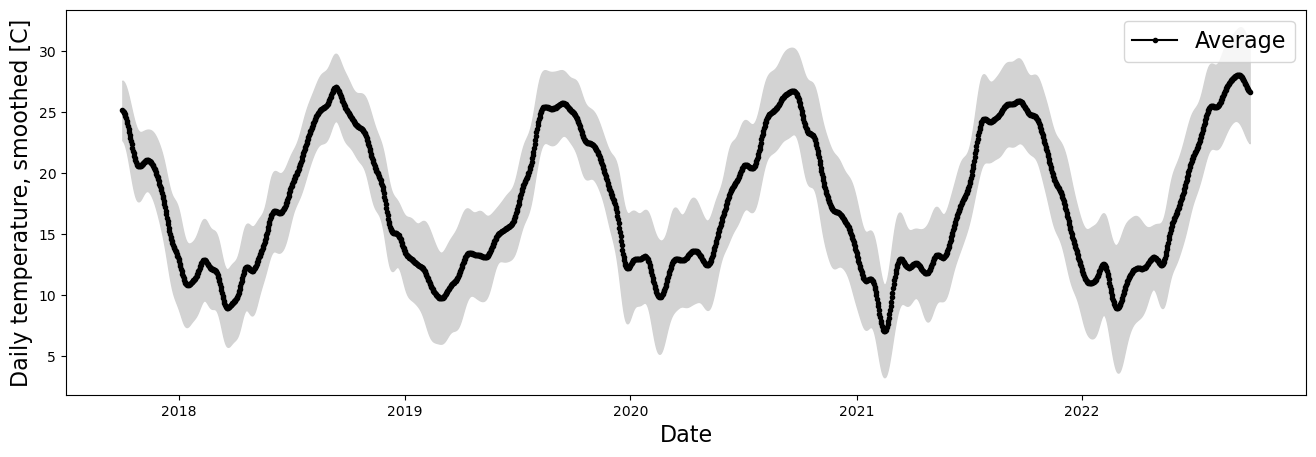

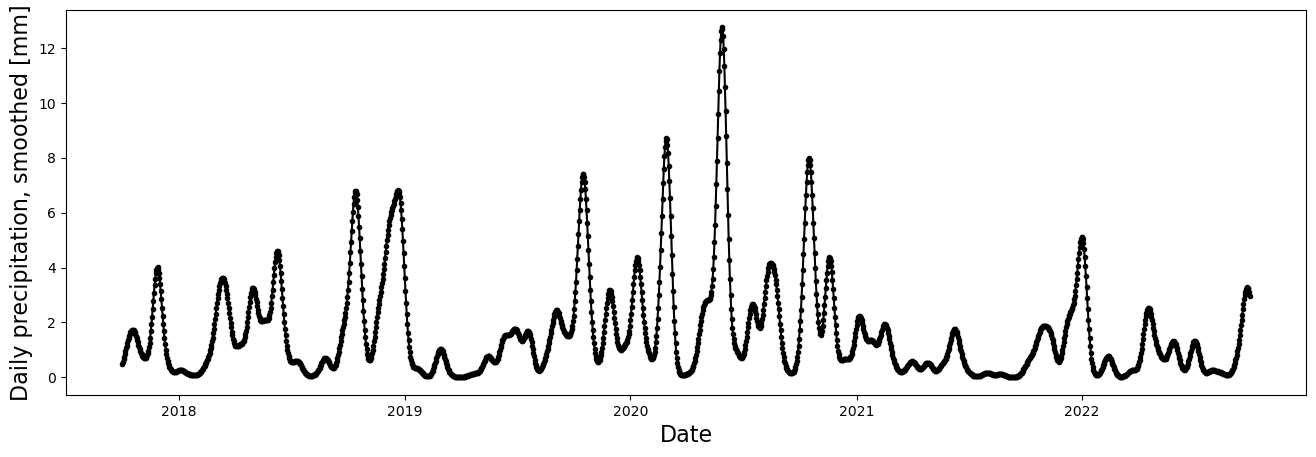

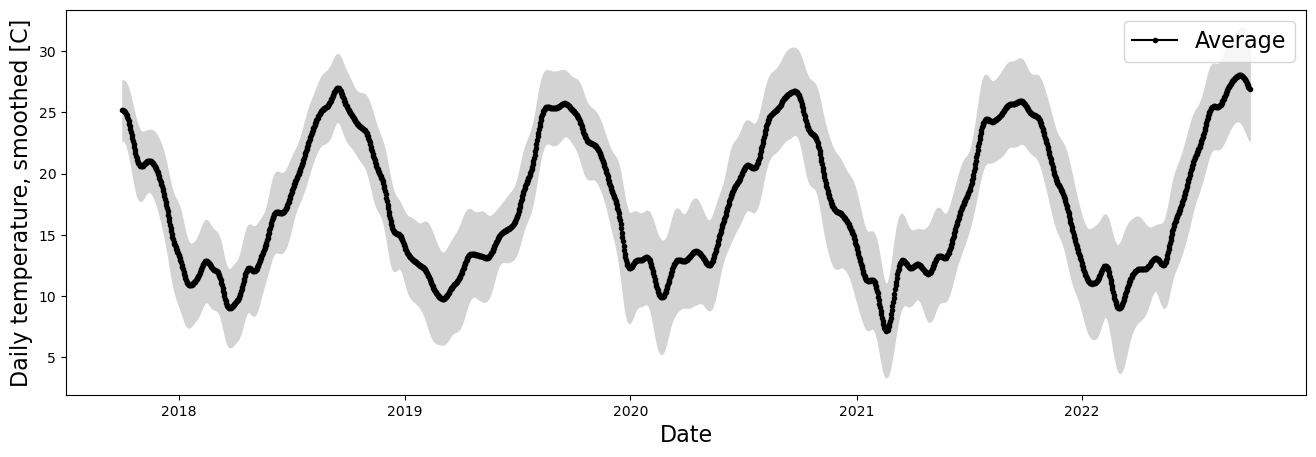

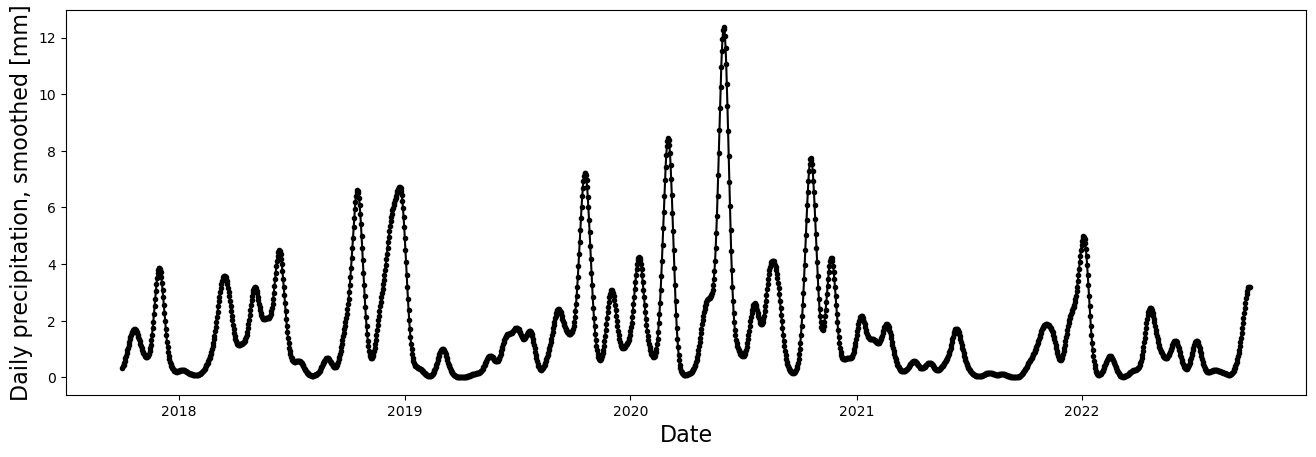

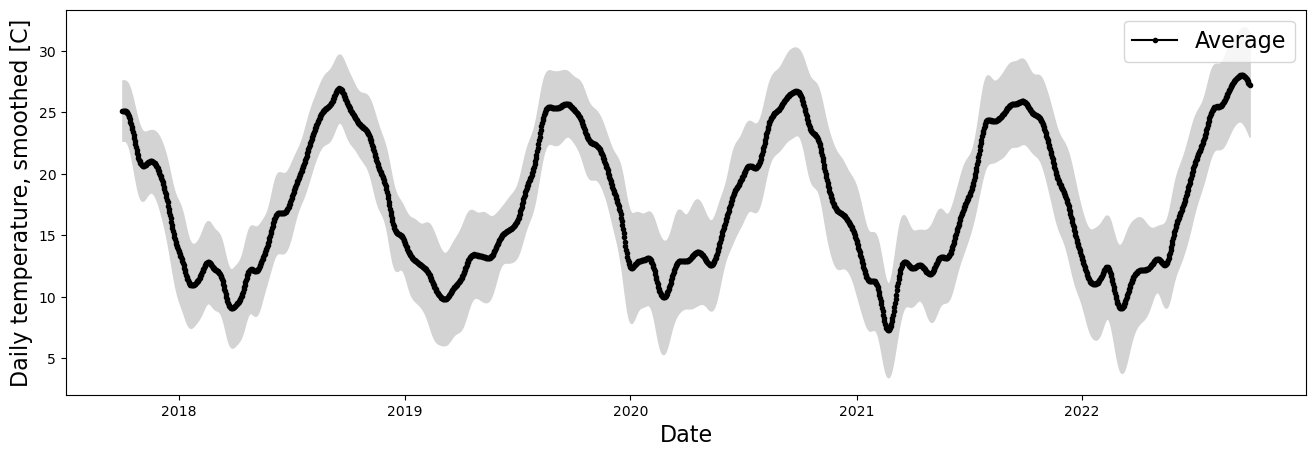

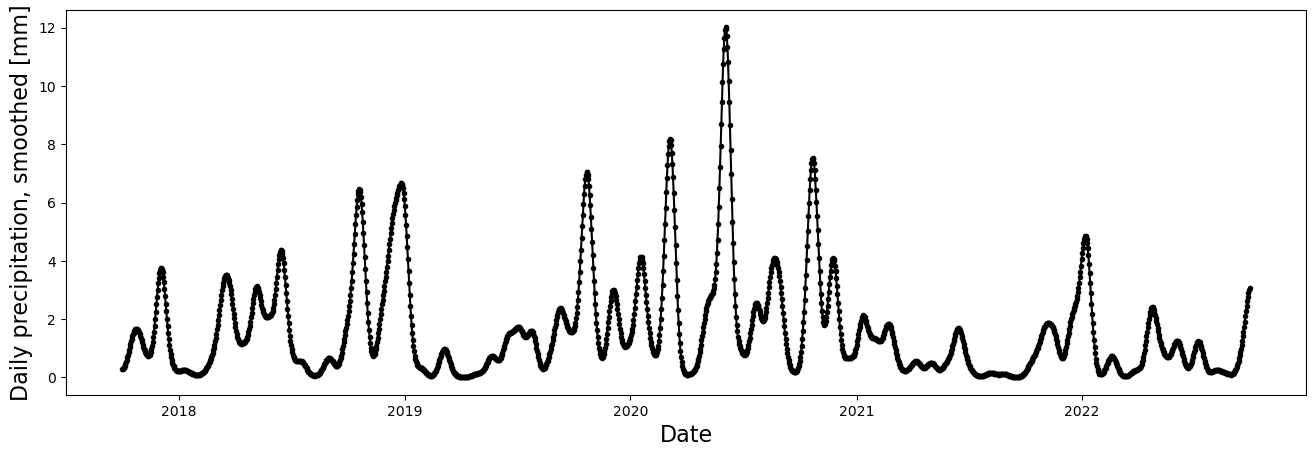

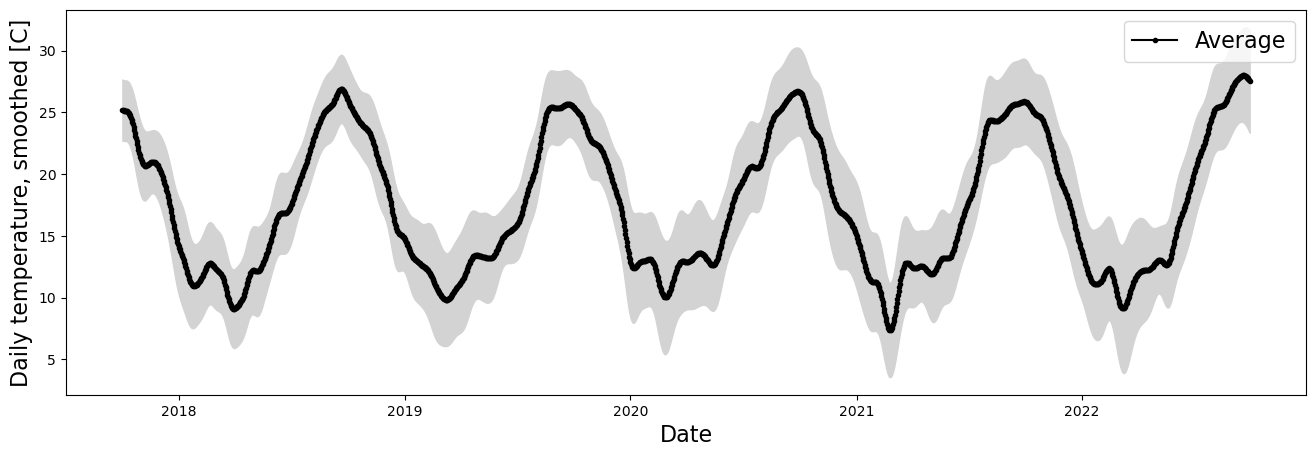

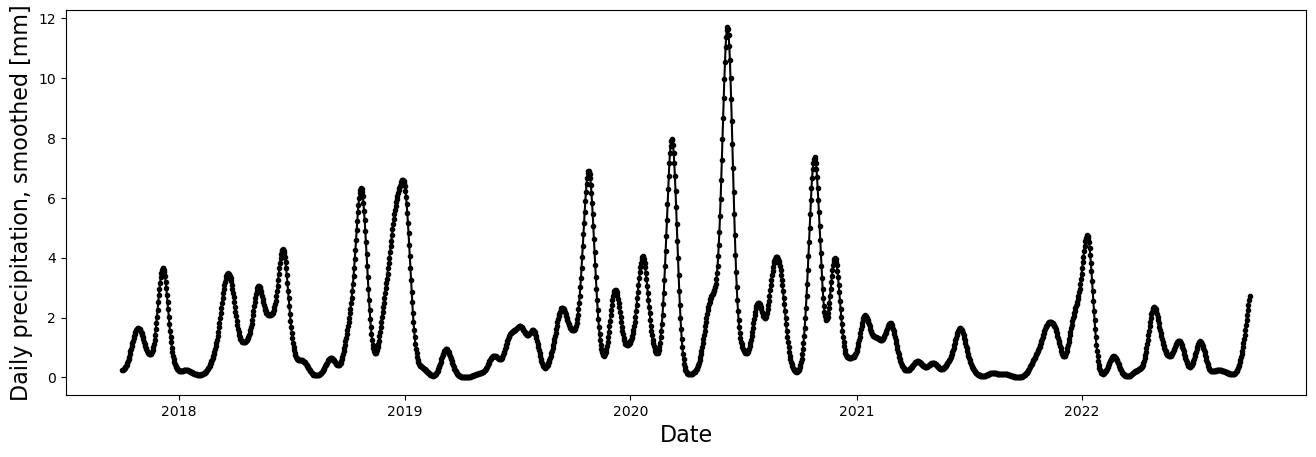

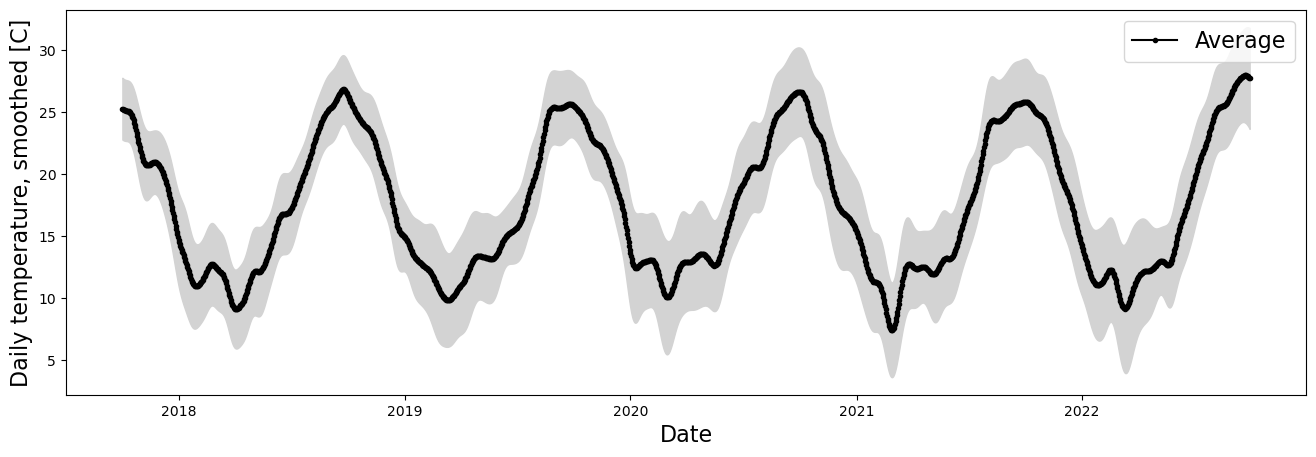

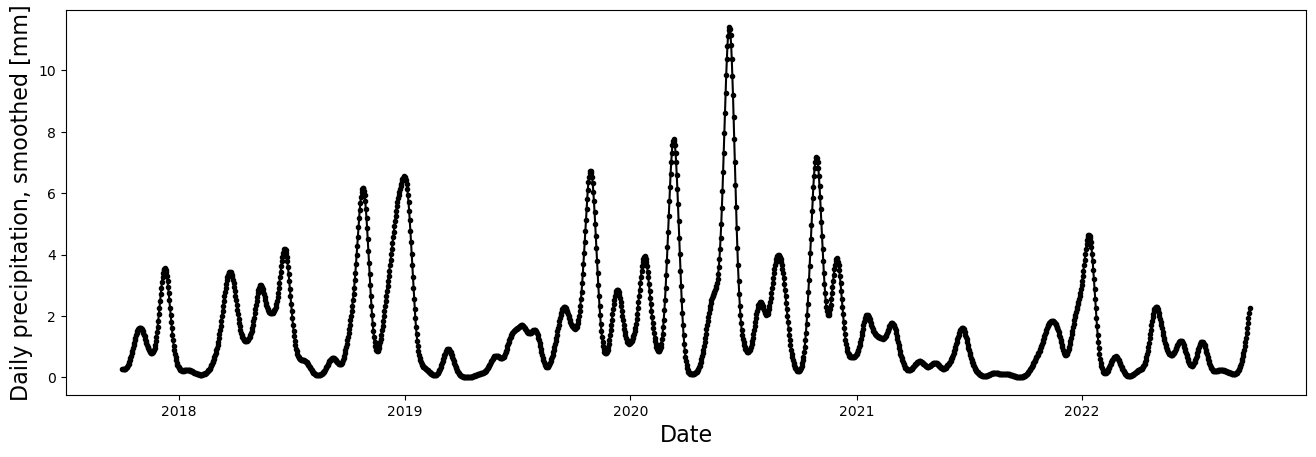

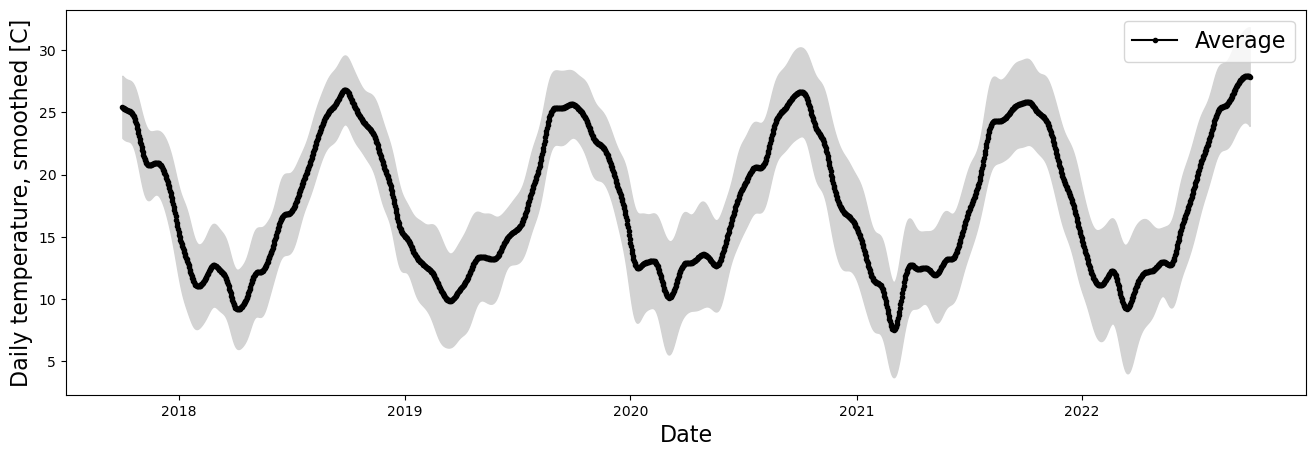

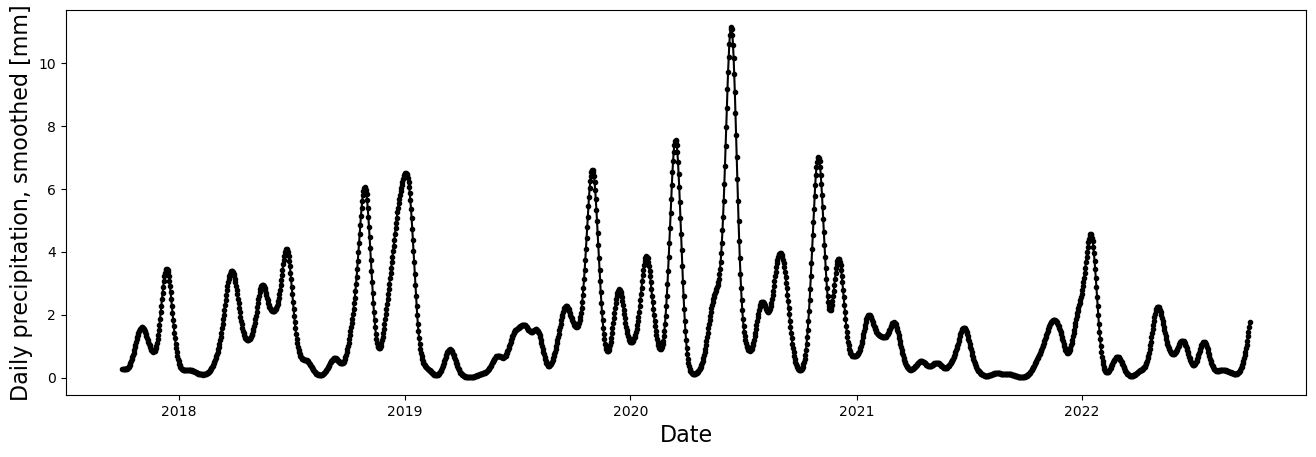

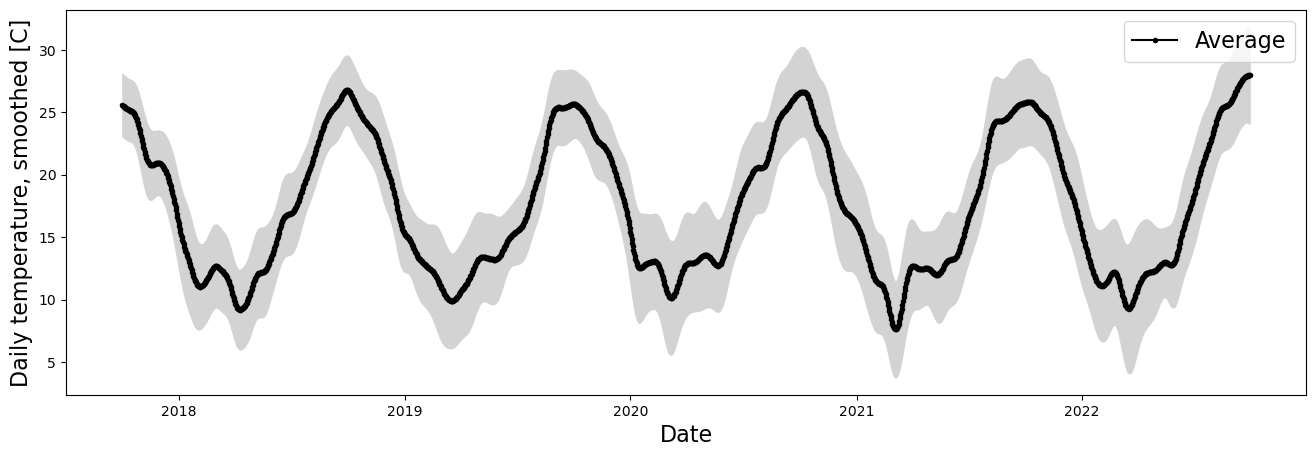

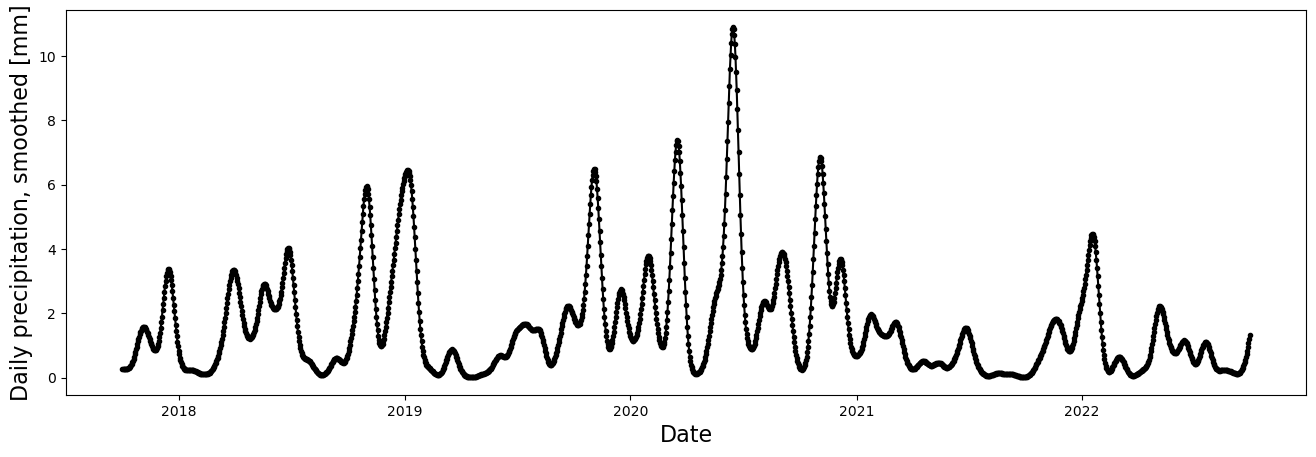

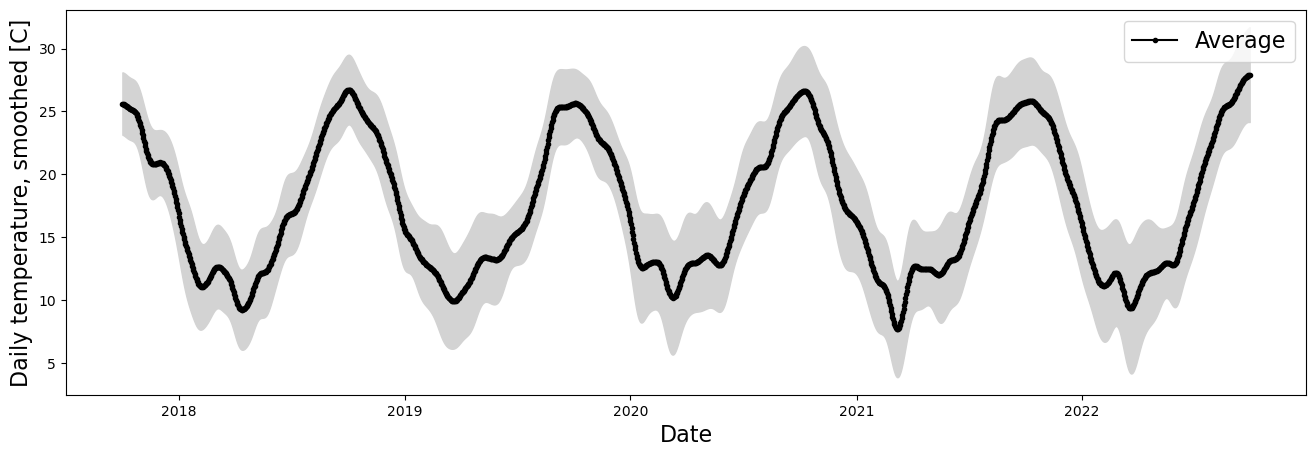

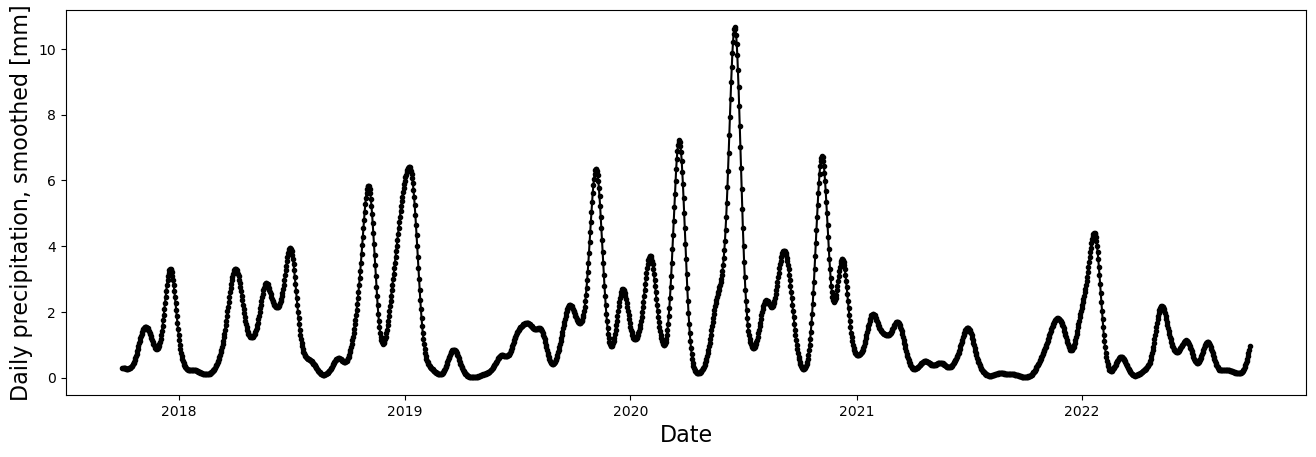

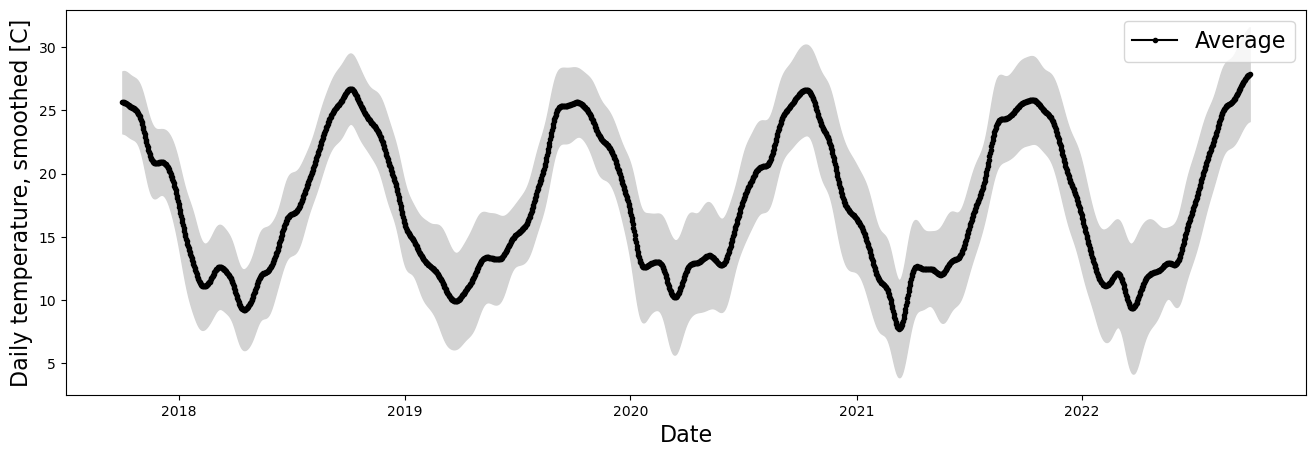

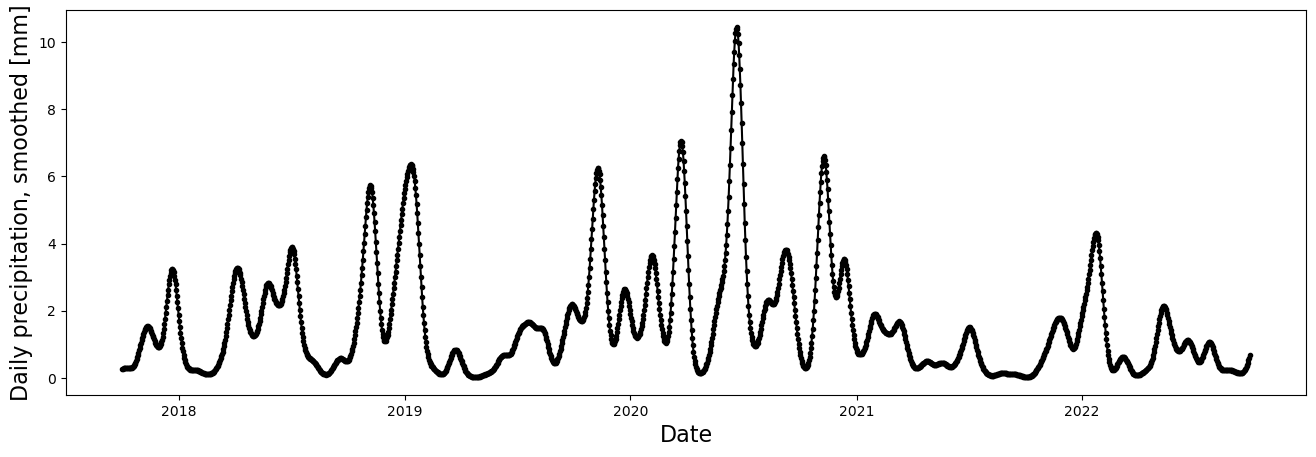

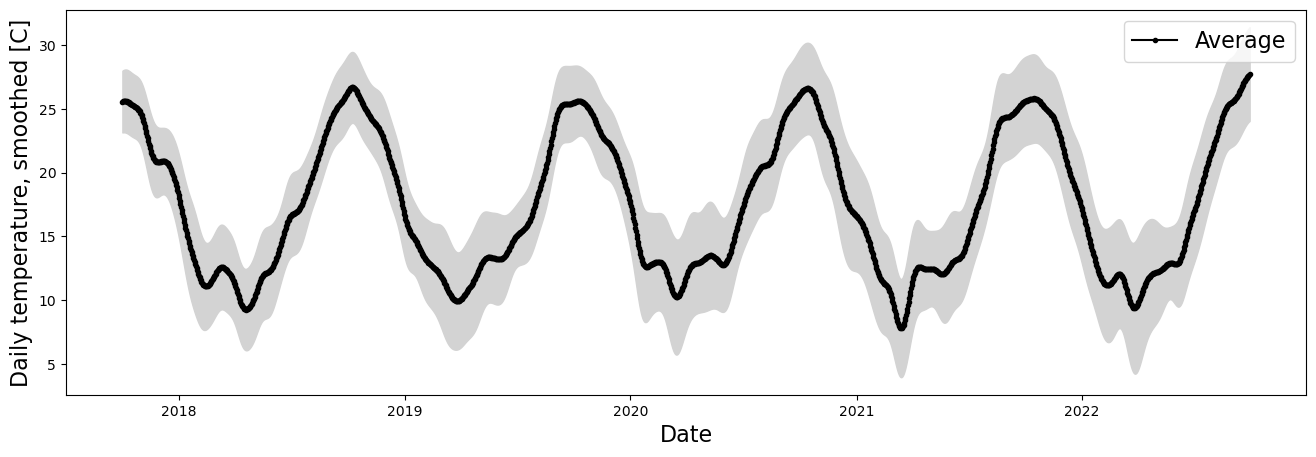

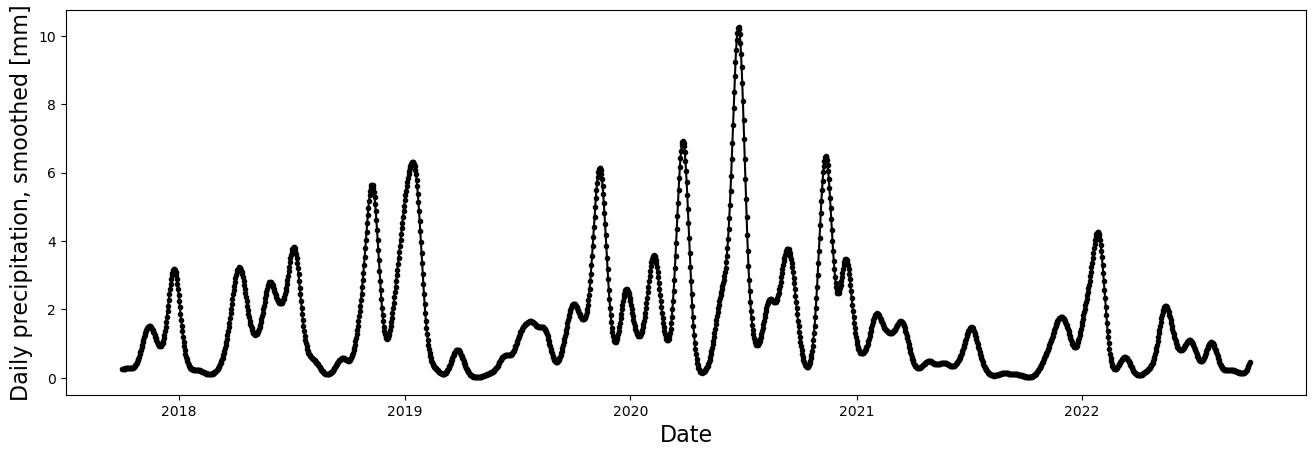

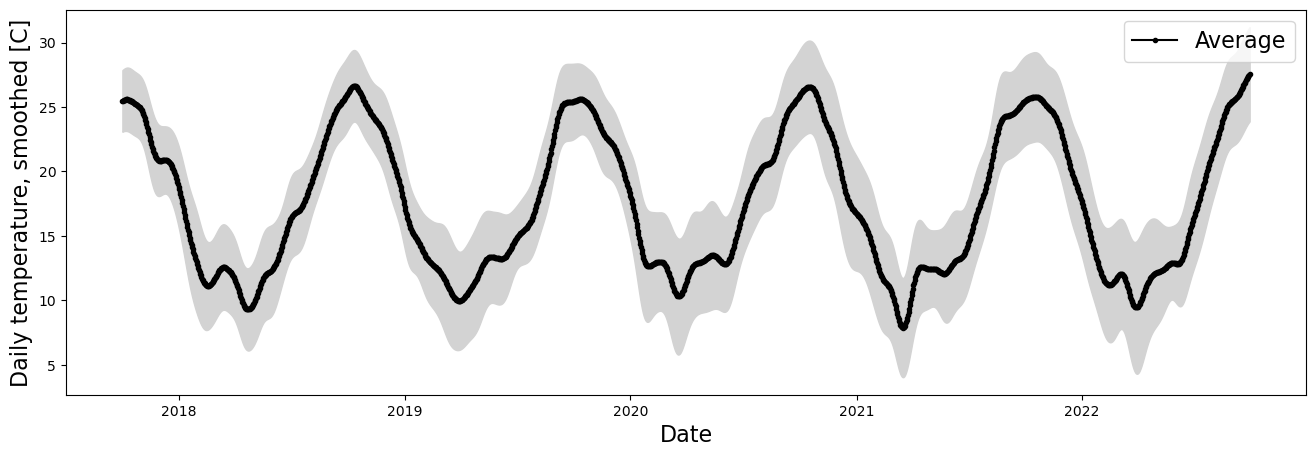

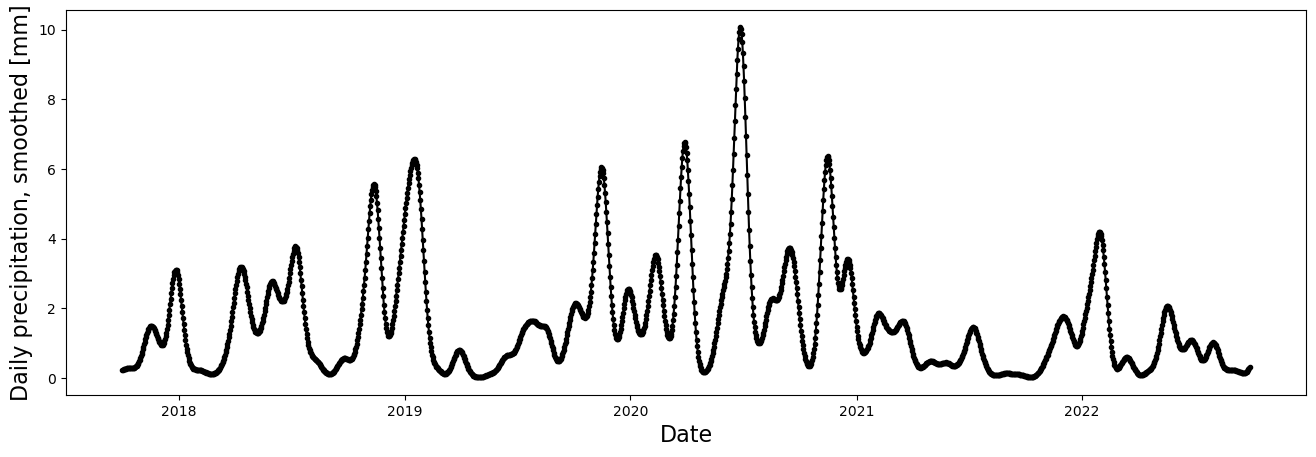

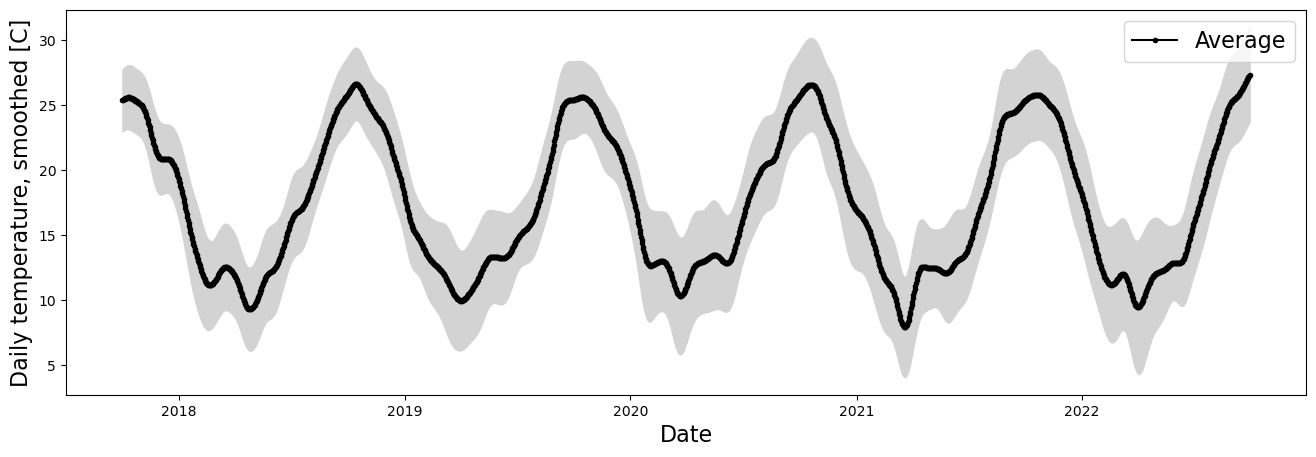

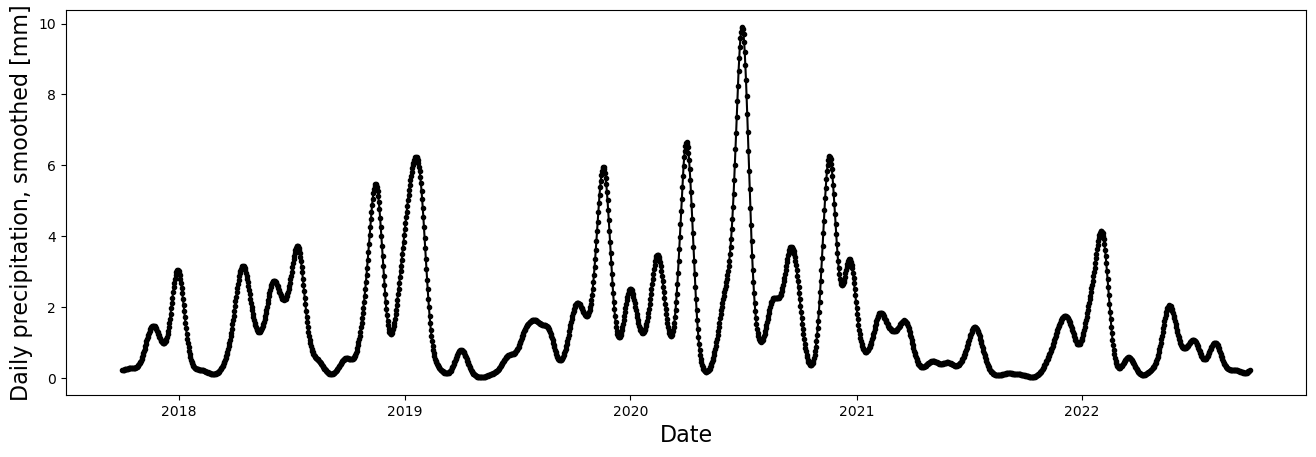

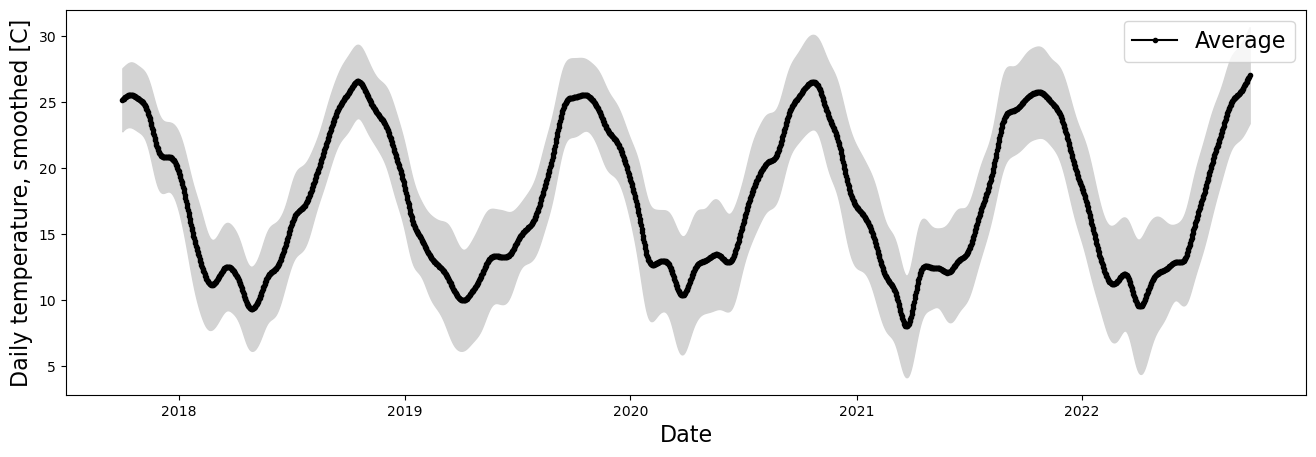

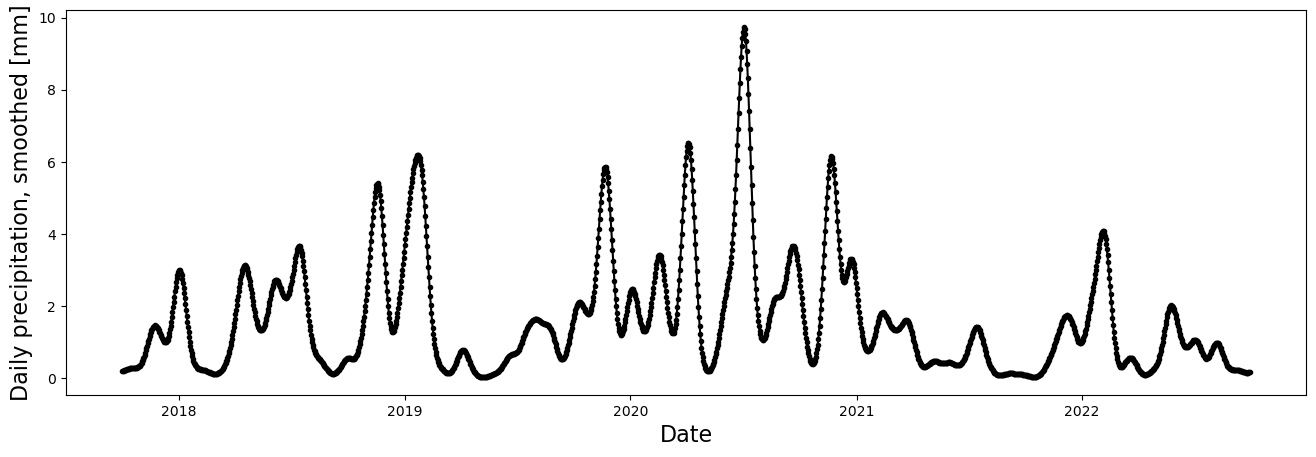

In [16]:
test = weather.copy()
for i in range(25):
    window_size = 7

    test = moving_average(test, window_size)

    test.head(10)

    test_sample = test.tail(5*365)

    plot_min_avg_max(test_sample, ylabel='Daily temperature, smoothed [C]')

    plot(test_sample, "rainfall", ylabel="Daily precipitation, smoothed [mm]")

    


<font size="+1" color="red">Brief commentary on what you see in the repeatedly smoothed dataset. Why does this happen?</font>

This plot exhibits a significantly smoother appearance when compared to the one above. While it retains its main peaks, numerous peaks have been smoothed to the extent of disappearance. This smoothing effect arises from multiple iterations of the same dataset.

## 1.2. Smooth the series by binning per floating weeks

<font size="+1" color="red">Implement "list_of_floating_week_starts"</font>

In [17]:
from datetime import timedelta

def list_of_floating_week_starts(first, last):
    weeks = []
    
    current_date = first

    while current_date <= last:
        weeks.append(current_date)
        current_date += timedelta(weeks=1)
    weeks.append(current_date)
    
    return(weeks)

In [18]:
# LEAVE AS-IS

first_day = np.min(weather.index)
last_day = np.max(weather.index)
weeks = list_of_floating_week_starts(first_day, last_day)

print("There are %d week starts" % len(weeks))
print("First week starts %s, last week starts %s" % (weeks[0].strftime("%Y-%m-%d"), weeks[-1].strftime("%Y-%m-%d")))

There are 327 week starts
First week starts 2016-07-01, last week starts 2022-09-30


In [19]:
# LEAVE AS-IS

# Create a map from dates to week starts
date_to_week_start= {}
week_num = 0
for date, row in weather.iterrows():
    while not (date >= weeks[week_num] and date < weeks[week_num+1]):
        week_num += 1
    date_to_week_start[date] = weeks[week_num]
    
# Create a new dataframe with an extra column
weather_with_week_start = weather
weather_with_week_start['week_start'] = [date_to_week_start[date] for date in weather.index]
weather_with_week_start.head(10)

temp_avg  rainfall  temp_min  temp_max  windspeed_dir  \
date                                                                
2016-07-01      24.1       0.0      21.9      26.3           99.0   
2016-07-02      24.6       0.0      22.3      27.0           13.0   
2016-07-03      23.4       0.0      21.9      24.9           20.0   
2016-07-04      23.8       0.0      21.8      25.9           25.0   
2016-07-05      25.3       0.0      23.2      27.4           35.0   
2016-07-06      25.8       0.0      23.1      28.5           20.0   
2016-07-07      25.4       0.0      23.7      27.1           99.0   
2016-07-08      26.2       0.1      24.0      28.4           23.0   
2016-07-09      26.6       0.0      24.8      28.5           18.0   
2016-07-10      26.8       0.0      24.9      28.6           19.0   

            windspeed_avg  windspeed_gusts  sun  pressure_max  pressure_min  \
date                                                                          
2016-07-01            3.1              5.8  NaN           NaN           NaN   
2016-07-02            3.6              7.5  NaN           NaN           NaN   
2016-07-03            4.2              8.9  NaN           NaN           NaN   
2016-07-04            3.3              6.7  NaN           NaN           NaN   
2016-07-05            3.1              6.4  NaN           NaN           NaN   
2016-07-06            5.0             11.7  NaN           NaN           NaN   
2016-07-07            3.9             10.3  NaN           NaN           NaN   
2016-07-08            2.5             10.6  NaN           NaN           NaN   
2016-07-09            3.1              6.7  NaN           NaN           NaN   
2016-07-10            4.7              9.2  NaN           NaN           NaN   

           week_start  
date                   
2016-07-01 2016-07-01  
2016-07-02 2016-07-01  
2016-07-03 2016-07-01  
2016-07-04 2016-07-01  
2016-07-05 2016-07-01  
2016-07-06 2016-07-01  
2016-07-07 2016-07-01  
2016-07-08 2016-07-08  
2016-07-09 2016-07-08  
2016-07-10 2016-07-08

<font size="+1" color="red">Generate the "weather_per_floating_week" dataframe </font>

In [20]:
weather_per_floating_week = pd.DataFrame(weather_with_week_start)

weather_per_floating_week = weather_per_floating_week.groupby('week_start').agg({
    'temp_min': np.mean,
    'temp_avg': np.mean,
    'temp_max': np.mean,
    'rainfall': np.sum
})

weather_per_floating_week.head(5)

temp_min   temp_avg   temp_max  rainfall
week_start                                           
2016-07-01  22.557143  24.628571  26.728571       0.0
2016-07-08  23.128571  25.314286  27.500000       0.4
2016-07-15  21.485714  24.171429  26.871429       0.6
2016-07-22  22.542857  25.428571  28.328571       5.8
2016-07-29  24.028571  25.957143  27.871429       0.6

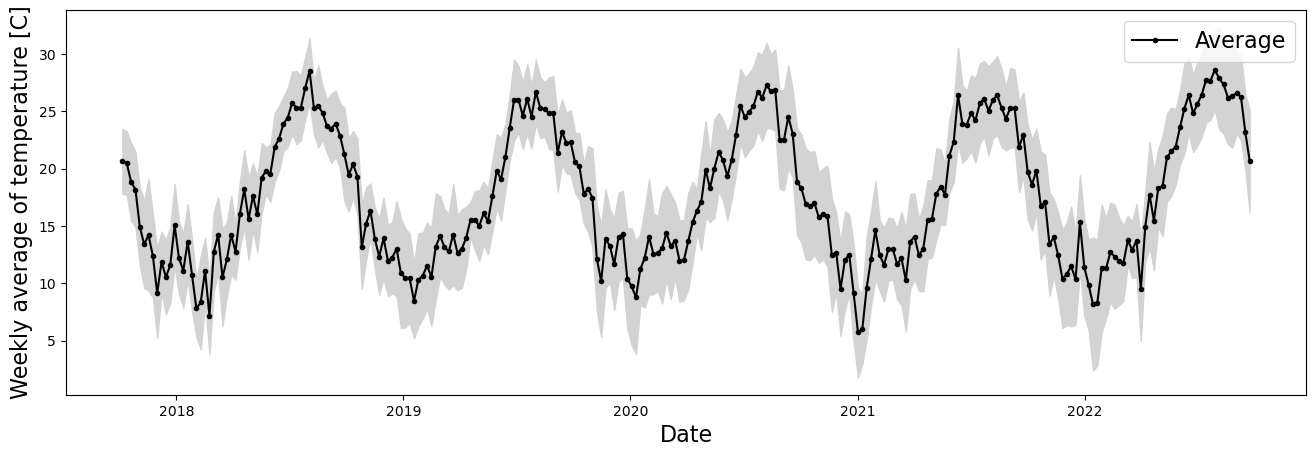

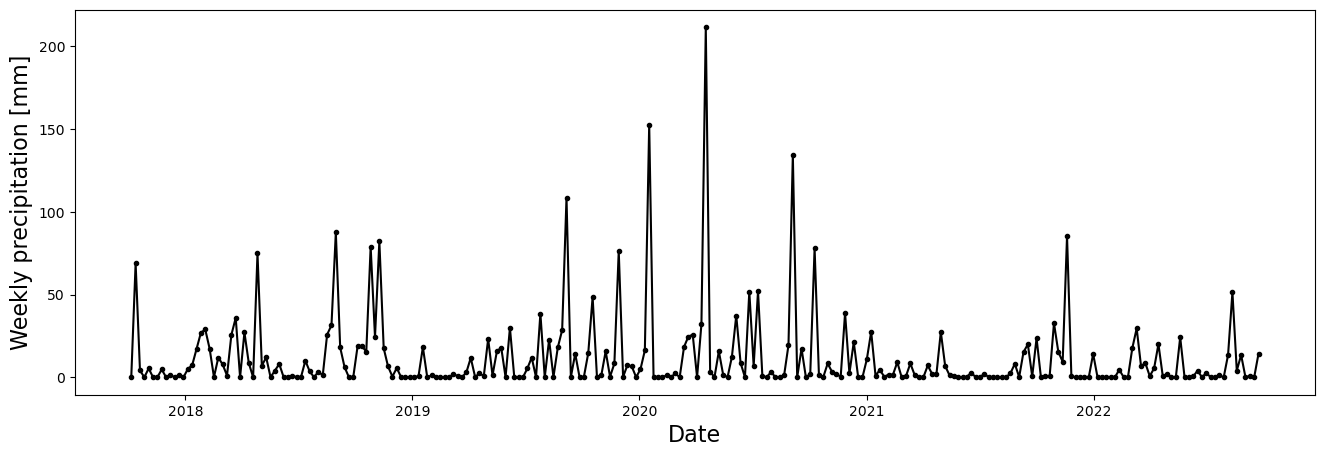

In [21]:
# LEAVE AS-IS

# Retrieve the past 5 years
weather_sample = weather_per_floating_week.tail(5*52)

# Plot temperature
plot_min_avg_max(weather_sample, ylabel="Weekly average of temperature [C]")

# Plot precipitation
plot(weather_sample, "rainfall", ylabel="Weekly precipitation [mm]")

<font size="+1" color="red">Brief commentary of what you observe on these plots.</font>

These plots reveal a pattern where there are 52 data points between each year, aligning with the number of weeks in a year. In contrast to the previous plots, this representation appears more generalized while still retaining the fundamental characteristics of the data.

## 1.3. Smooth the series by binning per month

In [22]:
def list_of_month_starts(first, last):
    month_starts = []
    current_month = first.replace(day=1)

    while current_month <= last:
        month_starts.append(current_month)
        # Manually increment year and month
        if current_month.month < 12:
            current_month = current_month.replace(year=current_month.year, month=current_month.month + 1)
        else:
            current_month = current_month.replace(year=current_month.year + 1, month=1)

    # Ensure the last month start is included even if it starts after the end of the series
    next_month_start = current_month.replace(year=current_month.year + 1, month=1)
    if next_month_start > last:
        month_starts.append(current_month)

    return month_starts


In [23]:
# LEAVE AS-IS

first_day = np.min(weather.index)
last_day = np.max(weather.index)
months = list_of_month_starts(first_day, last_day)

print("There are %d month starts" % len(months))
print("First month starts %s, last month starts %s" % (months[0].strftime("%Y-%m-%d"), months[-1].strftime("%Y-%m-%d")))

There are 76 month starts
First month starts 2016-07-01, last month starts 2022-10-01


In [24]:
# LEAVE AS-IS

# Create a map from dates to week starts
date_to_month_start= {}
month_num = 0
for date, row in weather.iterrows():
    while not (date >= months[month_num] and date < months[month_num+1]):
        month_num += 1
    date_to_month_start[date] = months[month_num]
    
# Create a new dataframe with an extra column
weather_with_month_start = weather
weather_with_month_start['month_start'] = [date_to_month_start[date] for date in weather.index]
weather_with_month_start

temp_avg  rainfall  temp_min  temp_max  windspeed_dir  \
date                                                                
2016-07-01      24.1       0.0      21.9      26.3           99.0   
2016-07-02      24.6       0.0      22.3      27.0           13.0   
2016-07-03      23.4       0.0      21.9      24.9           20.0   
2016-07-04      23.8       0.0      21.8      25.9           25.0   
2016-07-05      25.3       0.0      23.2      27.4           35.0   
...              ...       ...       ...       ...            ...   
2022-09-25      20.0       0.0      16.4      23.7            1.0   
2022-09-26      20.3       0.0      15.0      25.6           25.0   
2022-09-27      20.0       0.0      15.3      24.7           35.0   
2022-09-28      21.9       0.0      16.8      27.0           30.0   
2022-09-29      20.4       0.0      16.3      24.6            8.0   

            windspeed_avg  windspeed_gusts  sun  pressure_max  pressure_min  \
date                                                                          
2016-07-01            3.1              5.8  NaN           NaN           NaN   
2016-07-02            3.6              7.5  NaN           NaN           NaN   
2016-07-03            4.2              8.9  NaN           NaN           NaN   
2016-07-04            3.3              6.7  NaN           NaN           NaN   
2016-07-05            3.1              6.4  NaN           NaN           NaN   
...                   ...              ...  ...           ...           ...   
2022-09-25            4.2              8.9  5.9        1013.3        1011.5   
2022-09-26            5.6             13.3  9.7        1012.7        1009.7   
2022-09-27            3.3              8.9  8.2        1011.5        1008.8   
2022-09-28            5.0             12.5  3.5        1010.8        1003.6   
2022-09-29            4.2             16.1  3.8        1005.0        1000.4   

           week_start month_start  
date                               
2016-07-01 2016-07-01  2016-07-01  
2016-07-02 2016-07-01  2016-07-01  
2016-07-03 2016-07-01  2016-07-01  
2016-07-04 2016-07-01  2016-07-01  
2016-07-05 2016-07-01  2016-07-01  
...               ...         ...  
2022-09-25 2022-09-23  2022-09-01  
2022-09-26 2022-09-23  2022-09-01  
2022-09-27 2022-09-23  2022-09-01  
2022-09-28 2022-09-23  2022-09-01  
2022-09-29 2022-09-23  2022-09-01  

[2280 rows x 12 columns]

<font size="+1" color="red">Generate the "weather_per_month" dataframe</font>

In [25]:
weather_per_month = pd.DataFrame(weather_with_month_start)

weather_per_month = weather_per_month.groupby('month_start').agg({
    'temp_min': np.mean,
    'temp_avg': np.mean,
    'temp_max': np.mean,
    'rainfall': np.sum
})

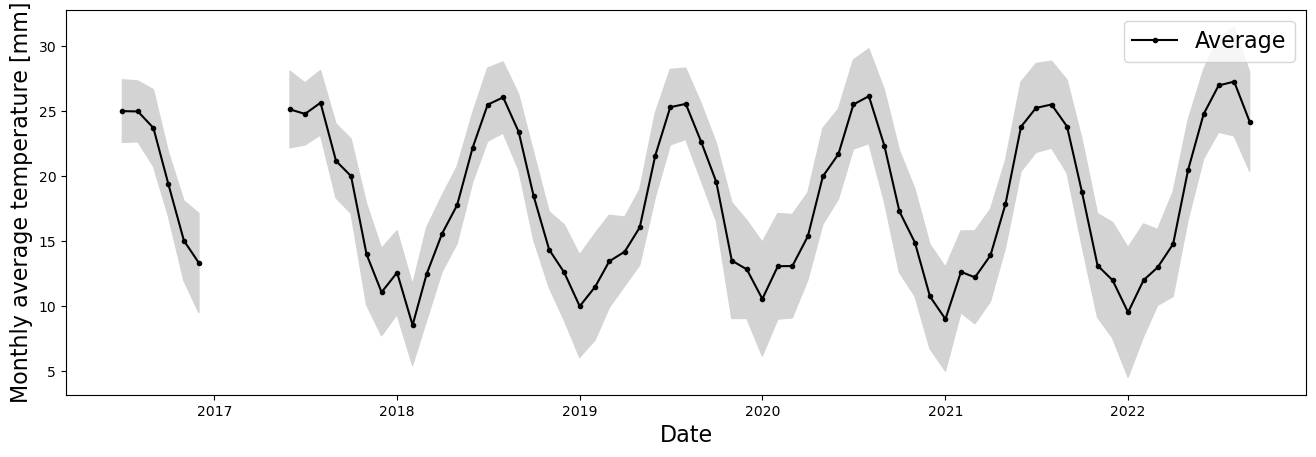

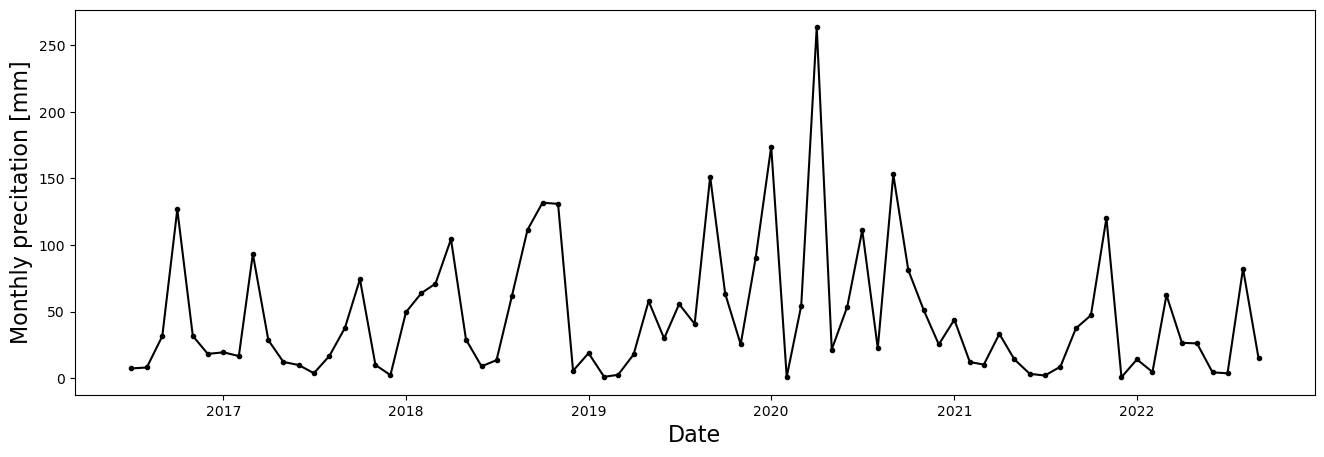

In [26]:
# LEAVE AS-IS

# Retrieve the last 7 years
weather_sample = weather_per_month.tail(7*12)

# Plot temperature
plot_min_avg_max(weather_sample, ylabel="Monthly average temperature [mm]")

# Plot precipitation
plot(weather_sample, "rainfall", ylabel="Monthly precitation [mm]")

<font size="+1" color="red">Brief commentary of what you observe on these plots.</font>

Examining these plots, we observe that there are 12 data points between each year, corresponding to the number of months in a year. Unlike the weekly plot, this representation is more generalized and significantly distinct. While the temperature values exhibit a discernible pattern, the precipitation values lack a clear pattern. However, in the years 2017-18 and 2018-19, two prominent peaks emerge, suggesting a potential repetition, although this pattern does not persist across other years, preventing us from considering it as a consistent seasonality pattern.

# 2. Perform forecasting

## 2.1. Compute auto-correlation plots

<font size="+1" color="red">Implement "lagged_series"</font>

In [27]:
def lagged_series(series, lag):
    original_trimmed = []
    lagged = []
    for i in range(len(series)):
        j = i - lag
        if 0 <= j < len(series):
            original_trimmed.append(series[i])
            lagged.append(series[j])
    return original_trimmed, lagged

In [28]:
# LEAVE AS-IS

assert ([44, 55, 66, 77, 88], [11, 22, 33, 44, 55]) == lagged_series([11,22,33,44,55,66,77,88], 3)

assert ([33, 44, 55, 66, 77, 88], [11, 22, 33, 44, 55, 66]) == lagged_series([11,22,33,44,55,66,77,88], 2)

assert ([22, 33, 44, 55, 66, 77, 88], [11, 22, 33, 44, 55, 66, 77]) == lagged_series([11,22,33,44,55,66,77,88], 1)


In [29]:
# LEAVE AS-IS

# Computes the correlation between two vectors, considering
# only the positions in which both vectors are not NaN
def correlation_without_nan(x,y):
    positions_to_remove = ~np.logical_or(np.isnan(x), np.isnan(y))

    x_without_nan = np.compress(positions_to_remove, x)
    y_without_nan = np.compress(positions_to_remove, y)
    return stats.pearsonr(x_without_nan,y_without_nan)[0]  

# Compute autocorrelation
def autocorrelation(series, lag):
    x,y = lagged_series(series, lag)
            
    return correlation_without_nan(x,y)

<font size="+1" color="red">Compute "auto_correlations_temp" and "auto_correlations_rainfall"</font>

In [30]:
def compute_autocorrelations(series, max_periods):
    autocorrelations = []
    for lag in range(max_periods):
        autocorrelations.append(autocorrelation(series, lag))
    return autocorrelations

max_periods=2*365
auto_correlations_temp = compute_autocorrelations(weather['temp_avg'], max_periods)
auto_correlations_temp_max = compute_autocorrelations(weather['temp_max'], max_periods)
auto_correlations_rainfall = compute_autocorrelations(weather['rainfall'], max_periods)

In [31]:
# LEAVE AS-IS

def plot_auto_correlations(correlations, xlabel="Lag (days)", ylabel="Autocorrelation"):
    # Figure
    plt.figure(figsize=(15,4))

    # Plot correlation
    plt.plot(range(len(correlations)), correlations, '-o')

    # Add xticks every 10 periods
    plt.xticks(np.arange(0, len(correlations), 10), rotation=90)

    # Add a horizontal line at zero
    plt.hlines(0, xmin=0, xmax=len(correlations))

    # Add labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

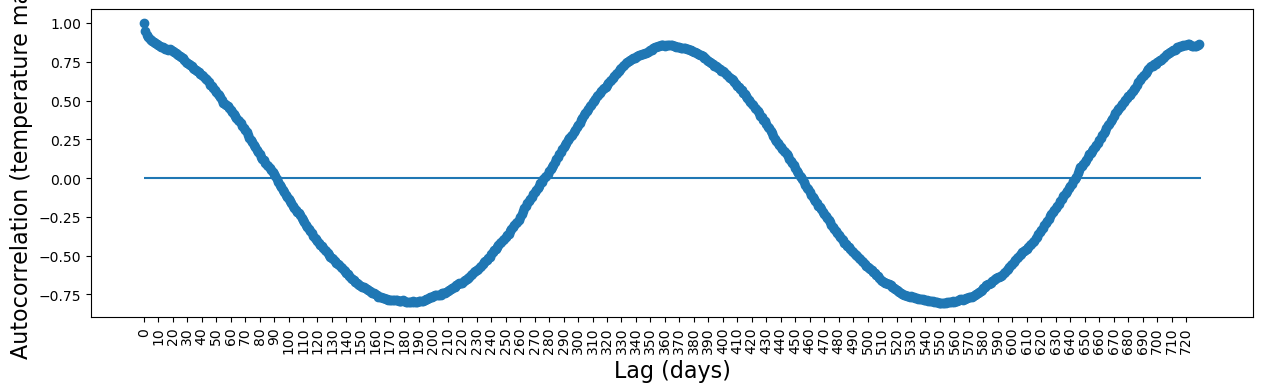

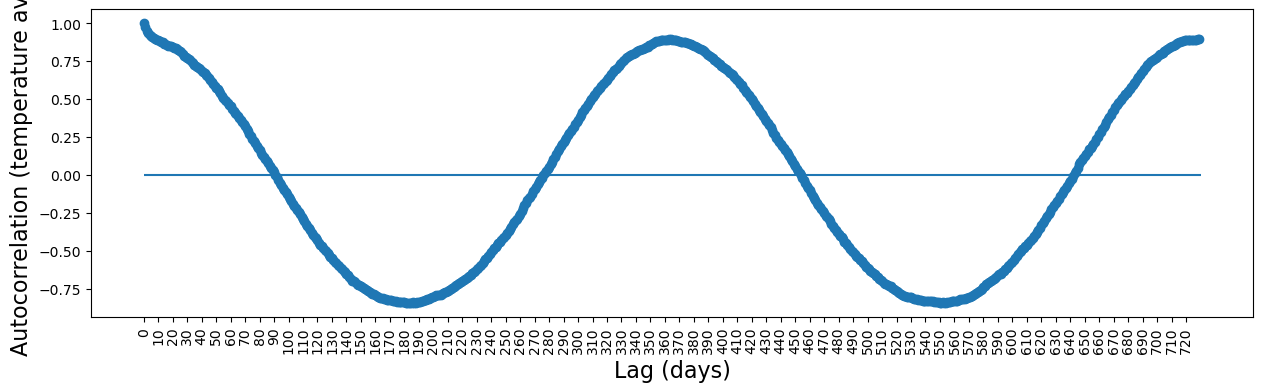

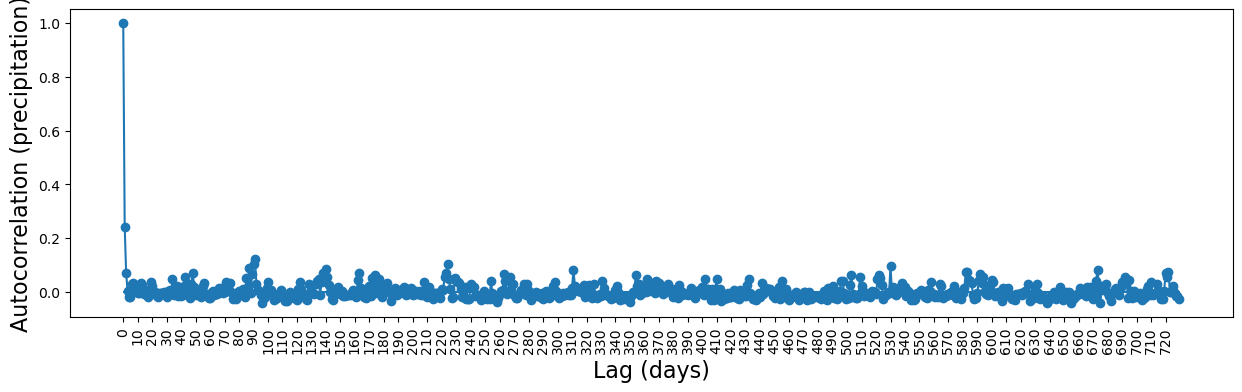

In [32]:
# LEAVE AS-IS

# Plot max temperature auto-correlation
plot_auto_correlations(auto_correlations_temp_max, ylabel="Autocorrelation (temperature max)")

# Plot avg temperature auto-correlation
plot_auto_correlations(auto_correlations_temp, ylabel="Autocorrelation (temperature avg)")

# Plot precipitation auto-correlation
plot_auto_correlations(auto_correlations_rainfall, ylabel="Autocorrelation (precipitation)")

<font size="+1" color="red">Brief commentary on what you see on these plots. Do you think these correlations reflect something real about the underlying data, or are spurious?</font>

Analyzing the temperature correlations, a distinct pattern emerges, reflecting a real underlying trend. This pattern repeats every 360 days. During cold months, the autocorrelation is notably high, while in hot months, it is significantly low, exhibiting a negative correlation.

Contrastingly, when examining the precipitation correlations, no discernible information can be extracted.

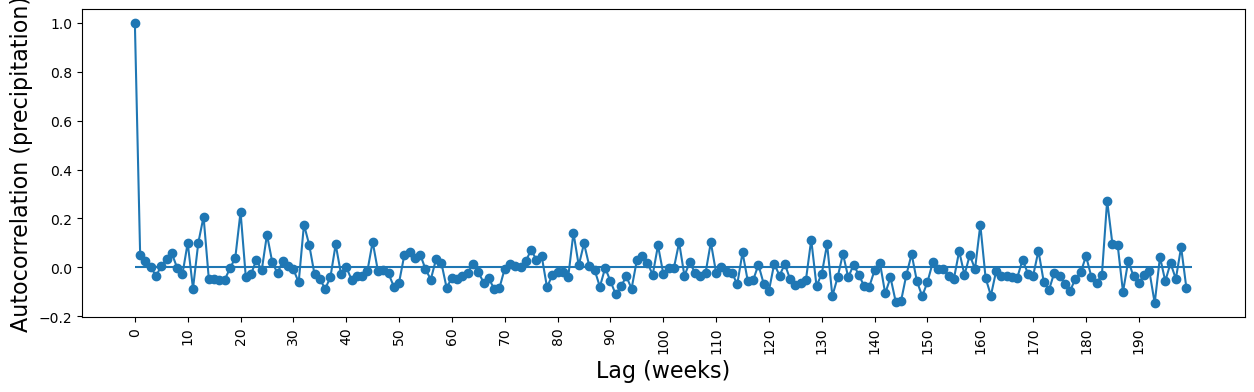

In [33]:
# LEAVE AS-IS

auto_correlations_rainfall_week = compute_autocorrelations(weather_per_floating_week['rainfall'], 200)

plot_auto_correlations(auto_correlations_rainfall_week, xlabel='Lag (weeks)', ylabel="Autocorrelation (precipitation)")

<font size="+1" color="red">Brief commentary on what you see on this plot. Do you think the correlations you observe in the weekly time series of precipitation (aside from the one at lag=1) come from a real dependency, or are spurious?</font>

While this plot holds more significance than its predecessor, it fails to reveal a discernible pattern every 52 weeks. This lack of periodicity suggests that the observed data is likely spurious in nature.

## 2.2. Prepare a system of equations to learn an auto-regressive model

<font size="+1" color="red">Implement "prepare_matrices"</font>

In [34]:
def prepare_matrices(series, lags):
    y = []
    X = []

    for lag in lags:
        assert(lag > 0)
        assert(lag < len(series))

    for i in range(np.max(lags), len(series)):
        # Check for NaN values in the lagged values or the target value
        if not any(np.isnan(series[i - lag]) for lag in lags) and not np.isnan(series[i]):
            row = [series[i - lag] for lag in lags]
            X.append(row)
            y.append(series[i])

    return X, y

In [35]:
# LEAVE AS-IS

X, y = prepare_matrices([11, 19, 32, 38, 51, 58, 69, 81], [2, 3])
print("X=%s" % X)
print("y=%s" % y)

X=[[19, 11], [32, 19], [38, 32], [51, 38], [58, 51]]
y=[38, 51, 58, 69, 81]


In [36]:
# LEAVE AS-IS

X, y = prepare_matrices([11, 19, 32, np.nan, 51, 58, 69, 81], [2, 3])
print("X=%s" % X)
print("y=%s" % y)

X=[[32, 19], [58, 51]]
y=[51, 81]


## 2.3. Perform forecasts

In [37]:
# LEAVE AS-IS

def perform_forecast(series, lags):

    # Prepare matrices for linear regression
    X, y = prepare_matrices(series, lags)

    # Perform forecast
    linear_regressor = LinearRegression()
    linear_regressor.fit(X,y)
    y_pred = linear_regressor.predict(X)

    # Compute forecasting error
    # Root mean squared error, normalized
    rmse = math.sqrt(mean_squared_error(y, y_pred))/(np.max(y)-np.min(y))
    
    # Return: observed, predicted, error
    return (y, y_pred, rmse)

def plot_forecast(y, y_pred, xlabel="Period", ylabel="", nrmsd=-1):

    plt.figure(figsize=(15,4))
    
    plt.plot(y, '.-', linewidth=4, color='gray', label='Observed')
    plt.plot(y_pred, '--', linewidth=2, color='magenta', label=('Model (NRMSD=%.2f)' % nrmsd if nrmsd > 0 else 'Model'))
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.legend()
    plt.show()

<font size="+1" color="red">Choice for "lags_monthly_temperature"</font>

In [38]:
lags_monthly_temperature = [1, 2, 3, 4]

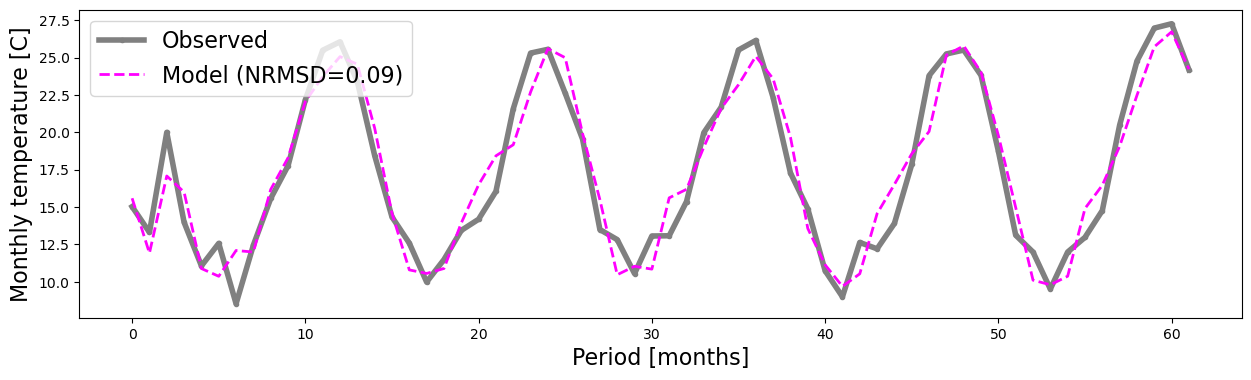

In [39]:
# LEAVE AS-IS

(y, y_pred, nrmsd) = perform_forecast(weather_per_month['temp_avg'], lags_monthly_temperature)
plot_forecast(y, y_pred, xlabel="Period [months]", ylabel="Monthly temperature [C]", nrmsd=nrmsd)

<font size="+1" color="red">Plots predicting: (1) weekly temperature, (2) daily temperature.</font>

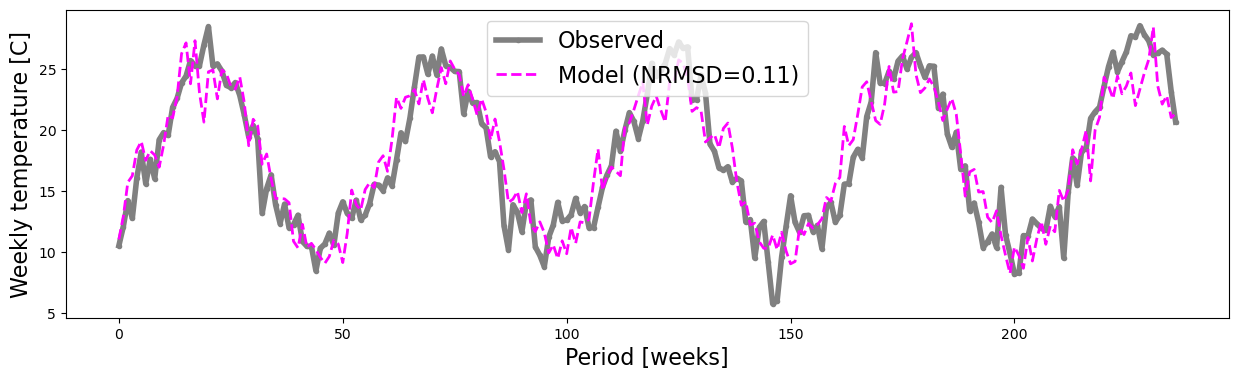

In [40]:
lags_weekly_temperature = [10,20,30,40]
(y, y_pred, nrmsd) = perform_forecast(weather_per_floating_week['temp_avg'], lags_weekly_temperature)
plot_forecast(y, y_pred, xlabel="Period [weeks]", ylabel="Weekly temperature [C]", nrmsd=nrmsd)

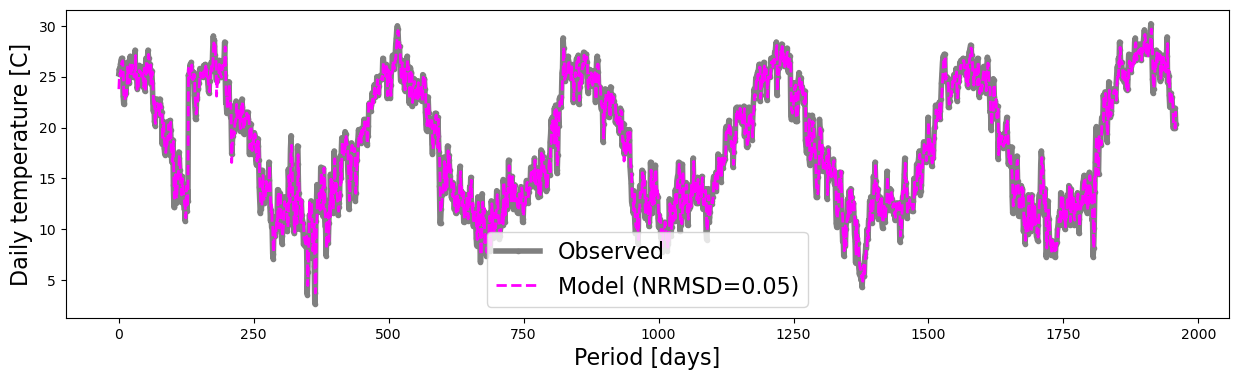

In [41]:
window_size = 1 #1 day
lags_daily_temperature = [1,2,3,4]
weather_smoothed_last_ex = moving_average(weather, window_size)

(y, y_pred, nrmsd) = perform_forecast(weather_smoothed_last_ex['temp_avg'], lags_daily_temperature)
plot_forecast(y, y_pred, xlabel="Period [days]", ylabel="Daily temperature [C]", nrmsd=nrmsd)

<font size="+1" color="red">Brief commentary on what you observe when predicting temperature.</font>

The overall prediction demonstrates high accuracy, exhibiting minimal errors in general.

<font size="+1" color="red">Plots predicting: (1) monthly rainfall, (2) weekly rainfall, (3) daily rainfall.  </font>

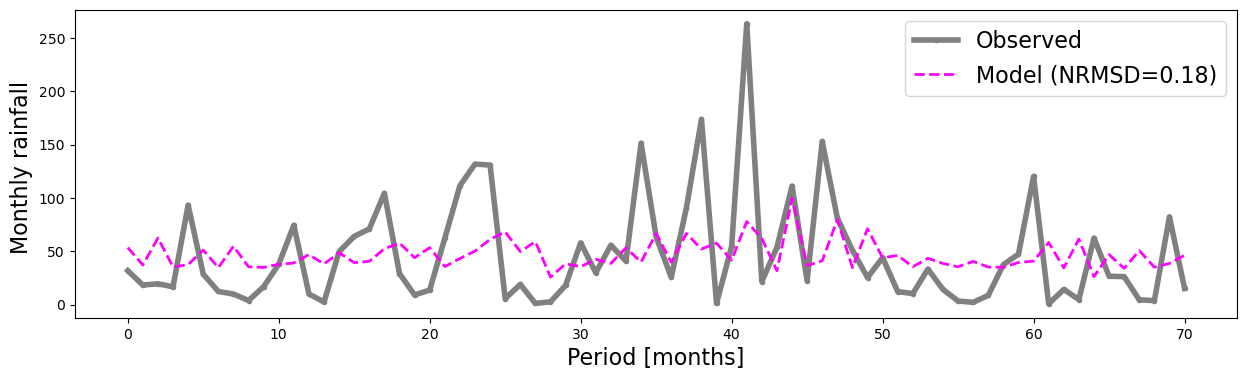

In [42]:
#same above but with 'rainfall' insted of 'temp_avg'
lags_monthly_rainfall = [1,2,3,4]
(y, y_pred, nrmsd) = perform_forecast(weather_per_month['rainfall'], lags_monthly_rainfall)
plot_forecast(y, y_pred, xlabel="Period [months]", ylabel="Monthly rainfall ", nrmsd=nrmsd)

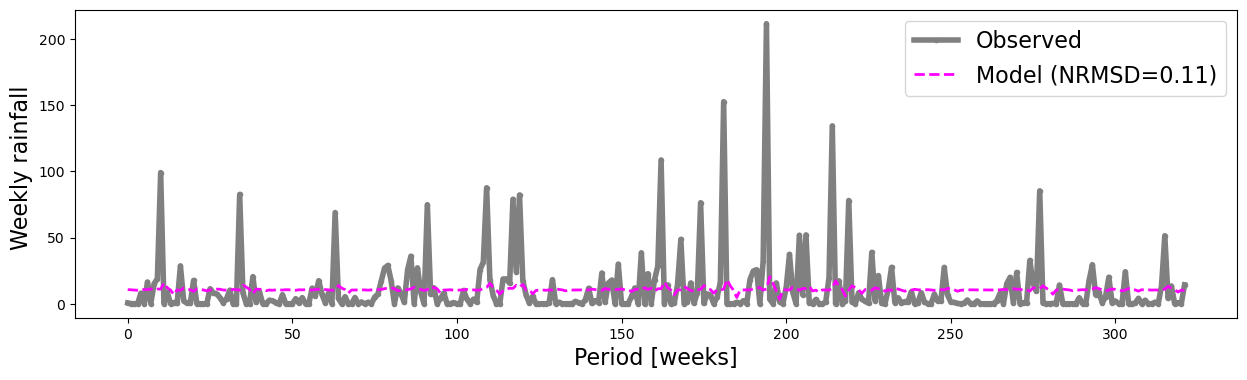

In [43]:
lags_weekly_rainfall = [1,2,3,4]
(y, y_pred, nrmsd) = perform_forecast(weather_per_floating_week['rainfall'], lags_weekly_rainfall)
plot_forecast(y, y_pred, xlabel="Period [weeks]", ylabel="Weekly rainfall ", nrmsd=nrmsd)

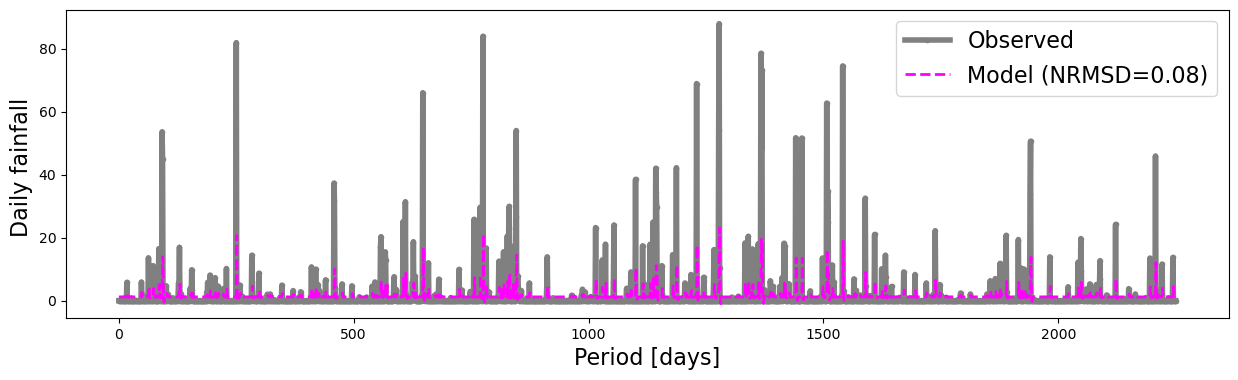

In [44]:
lags_daily_rainfall = [1,2,3,4]
window_size = 1 #1 day

weather_smoothed_last_ex = moving_average(weather, window_size)

(y, y_pred, nrmsd) = perform_forecast(weather_smoothed_last_ex['rainfall'], lags_daily_rainfall)
plot_forecast(y, y_pred, xlabel="Period [days]", ylabel="Daily fainfall ", nrmsd=nrmsd)

<font size="+1" color="red">Brief commentary on what you observe when trying to predict rainfall.</font>

In attempting to forecast rainfall, we observe that the predictions are not particularly accurate. Rainfall, being a measure without a discernible pattern, presents a challenge for prediction. Despite this difficulty, daily predictions tend to be more accurate compared to monthly predictions, as the latter lack a consistent underlying pattern, leading to less reliable forecasts.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>